In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/__results__.html
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/submission_pure.csv
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/submission.csv
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/__notebook__.ipynb
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/__output__.json
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/custom.css
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/__results___files/__results___60_2.png
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/__results___files/__results___20_13.png
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/__results___files/__results___20_1.png
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/__results___files/__results___41_1.png
/kaggle/input/ps3e26-cirrhosis-survial-multiclass-prediction/__results___files/__results___9_0.png
/kaggle/input/ps3e26-cirrhosis-survi

In [2]:
# Imports

import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
!pip install gap-stat
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
# !pip install optuna
import optuna
!pip install cmaes
import cmaes
import xgboost as xgb
!pip install catboost
# !pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
!pip install -U imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=a9eb12acbcce86d480ab12325548eec0aba6a2049614126f336413ff41628350
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat
  Obtaining dependency information for cmaes from https://files.pythonhosted.org/packages/f7/46/7d9544d453346f6c0c405916c95fdb653491ea2e9976cabb810ba2fe8cd4/cmaes-0.10.0-py3-none-any.whl.metadata


/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
test = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")
original = pd.read_csv("/kaggle/input/cirrhosis-patient-survival-prediction/cirrhosis.csv")

In [4]:
train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)
original.drop(columns=["ID"],inplace=True)

train_copy=train.copy()
test_copy=test.copy()
original_copy=original.copy()

In [5]:
original["original"] = 1

train["original"] = 0
test["original"] = 0

train=pd.concat([train,original],axis=0)
train.reset_index(inplace=True,drop=True)

target='Status'

train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,original
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,0
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,0
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,0
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,0
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,0


In [6]:
table = PrettyTable()

table.field_names = ['Feature', 'Data Type', 'Train Missing %', 'Test Missing %',"Original Missing%"]
for column in train_copy.columns:
    data_type = str(train_copy[column].dtype)
    non_null_count_train= np.round(100-train_copy[column].count()/train_copy.shape[0]*100,1)
    if column!=target:
        non_null_count_test = np.round(100-test_copy[column].count()/test_copy.shape[0]*100,1)
    else:
        non_null_count_test="NA"
    non_null_count_orig= np.round(100-original_copy[column].count()/original_copy.shape[0]*100,1)
    table.add_row([column, data_type, non_null_count_train,non_null_count_test,non_null_count_orig])
print(table)

+---------------+-----------+-----------------+----------------+-------------------+
|    Feature    | Data Type | Train Missing % | Test Missing % | Original Missing% |
+---------------+-----------+-----------------+----------------+-------------------+
|     N_Days    |   int64   |       0.0       |      0.0       |        0.0        |
|      Drug     |   object  |       0.0       |      0.0       |        25.4       |
|      Age      |   int64   |       0.0       |      0.0       |        0.0        |
|      Sex      |   object  |       0.0       |      0.0       |        0.0        |
|    Ascites    |   object  |       0.0       |      0.0       |        25.4       |
|  Hepatomegaly |   object  |       0.0       |      0.0       |        25.4       |
|    Spiders    |   object  |       0.0       |      0.0       |        25.4       |
|     Edema     |   object  |       0.0       |      0.0       |        0.0        |
|   Bilirubin   |  float64  |       0.0       |      0.0       | 

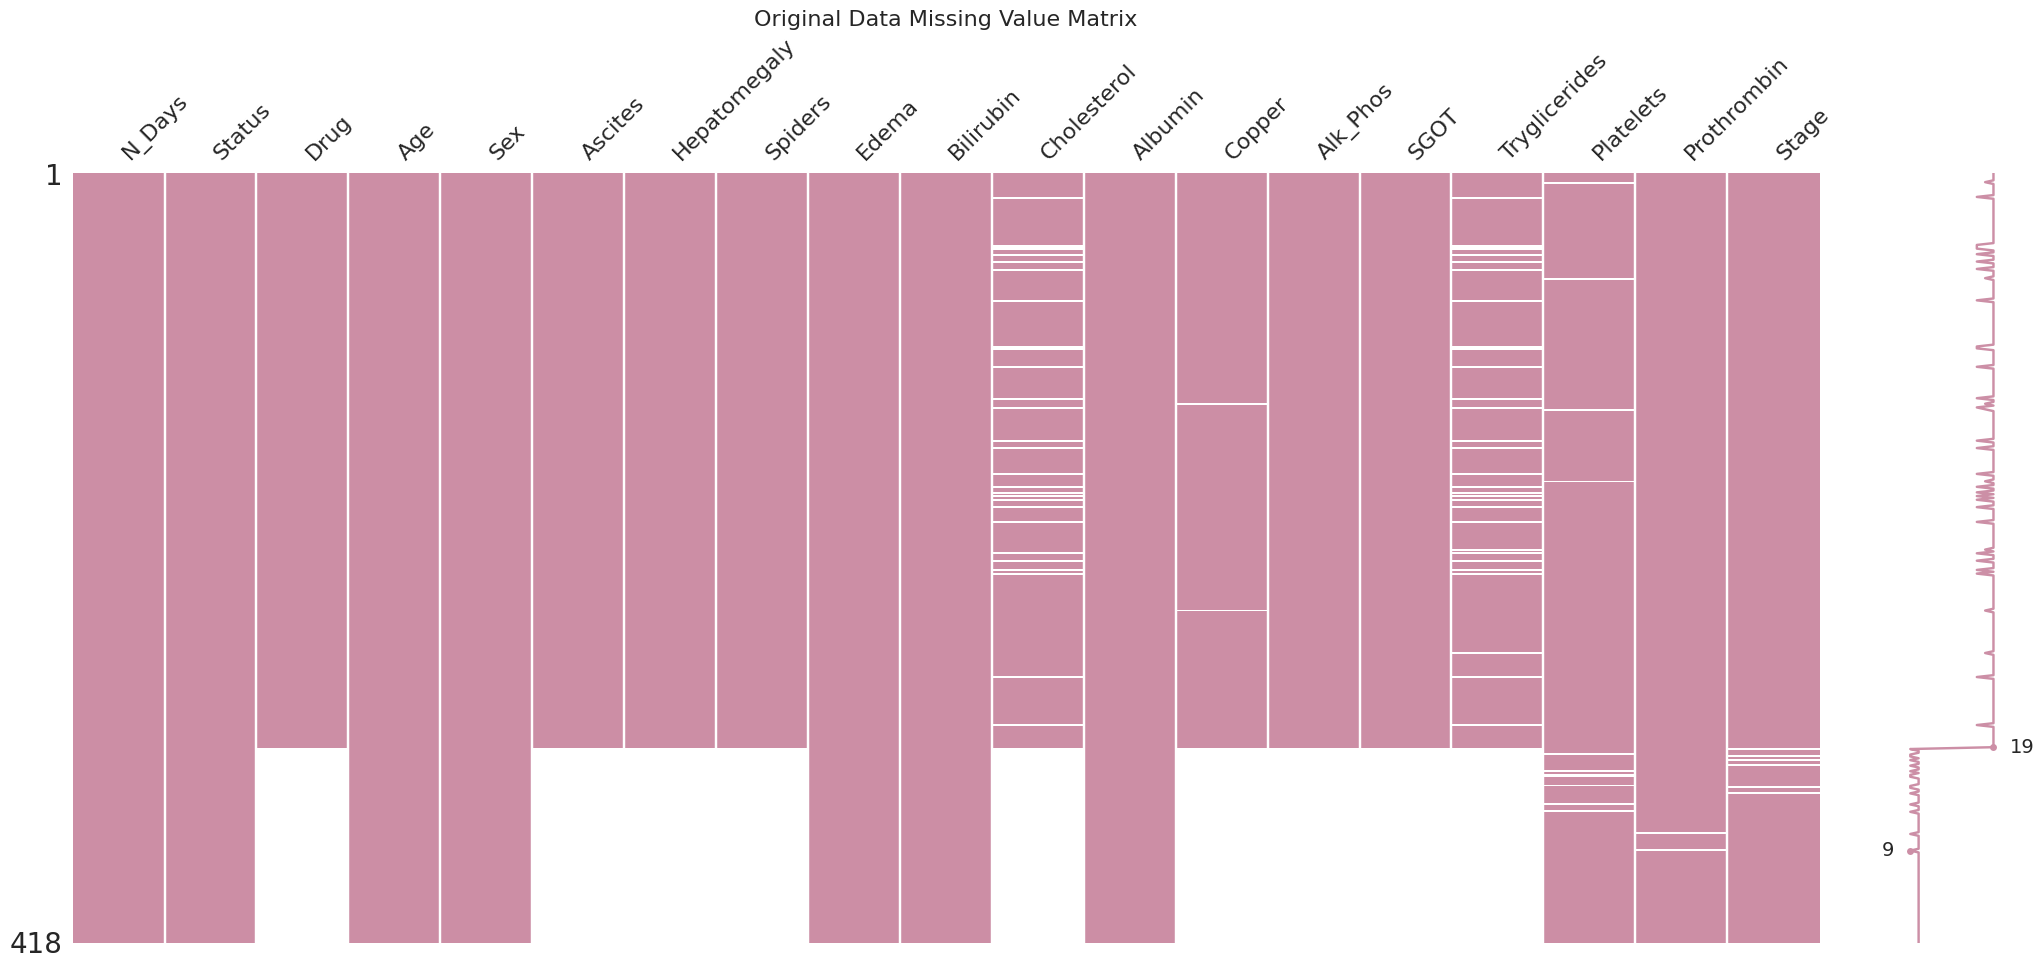

In [7]:
msno.matrix(original_copy, color=  (0.8, 0.56, 0.65))
plt.title("Original Data Missing Value Matrix", fontsize=16)
plt.show()

In [8]:
# EDA

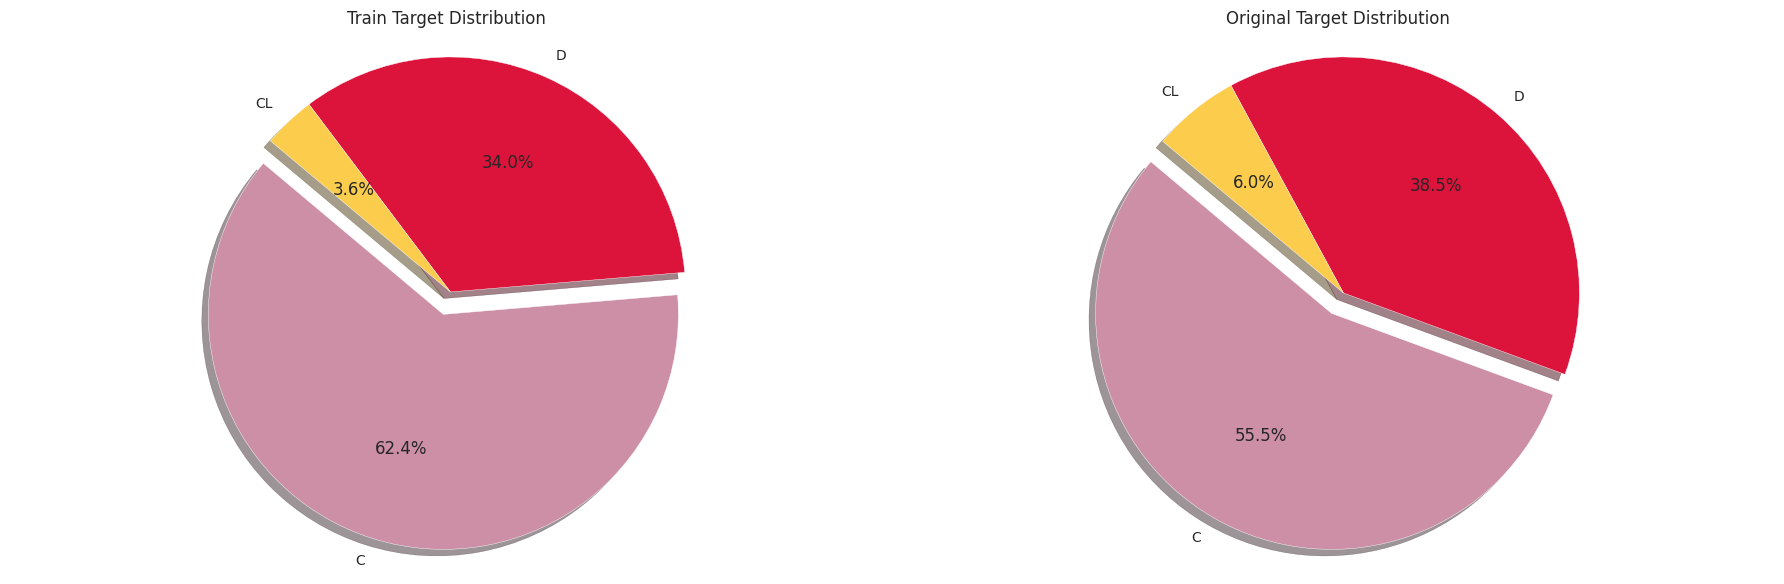

In [9]:
# Target distribution

def plot_pie_chart(data, title, ax):
    data_counts = data[target].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    colors = [(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)]  
    explode = (0.1, 0, 0)  

    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal') 
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create three subplots in a row

plot_pie_chart(train, "Train Target Distribution", axes[0])
plot_pie_chart(original, "Original Target Distribution", axes[1])

plt.tight_layout()
plt.show()




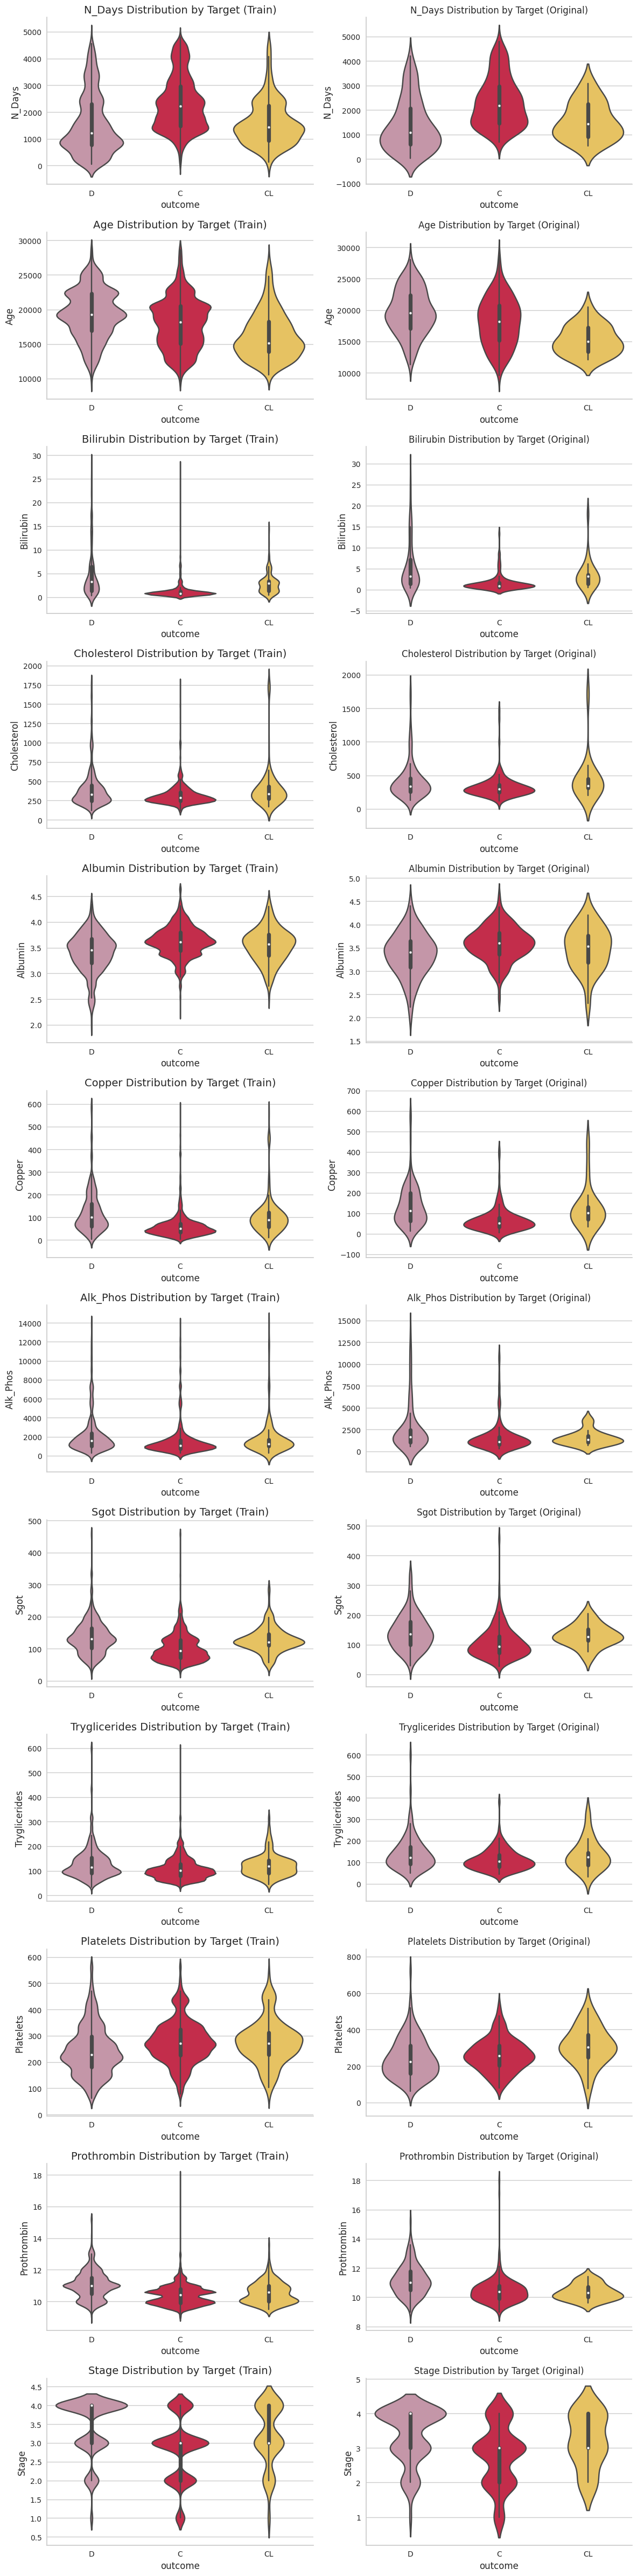

In [10]:
# Numerical 

cont_cols = [f for f in train.columns if train[f].dtype != 'O' and train[f].nunique() > 2]
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
sns.set_palette([(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)])  

for i, col in enumerate(cont_cols):
    sns.violinplot(x=target, y=col, data=train_copy, ax=axs[i, 0])
    axs[i, 0].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=14)
    axs[i, 0].set_xlabel('outcome', fontsize=12)
    axs[i, 0].set_ylabel(col.title(), fontsize=12)
    sns.despine()

    sns.violinplot(x=target, y=col, data=original, ax=axs[i, 1])
    axs[i, 1].set_title(f'{col.title()} Distribution by Target (Original)', fontsize=12)
    axs[i, 1].set_xlabel('outcome', fontsize=12)
    axs[i, 1].set_ylabel(col.title(), fontsize=12)
    sns.despine()

fig.tight_layout()

plt.show()


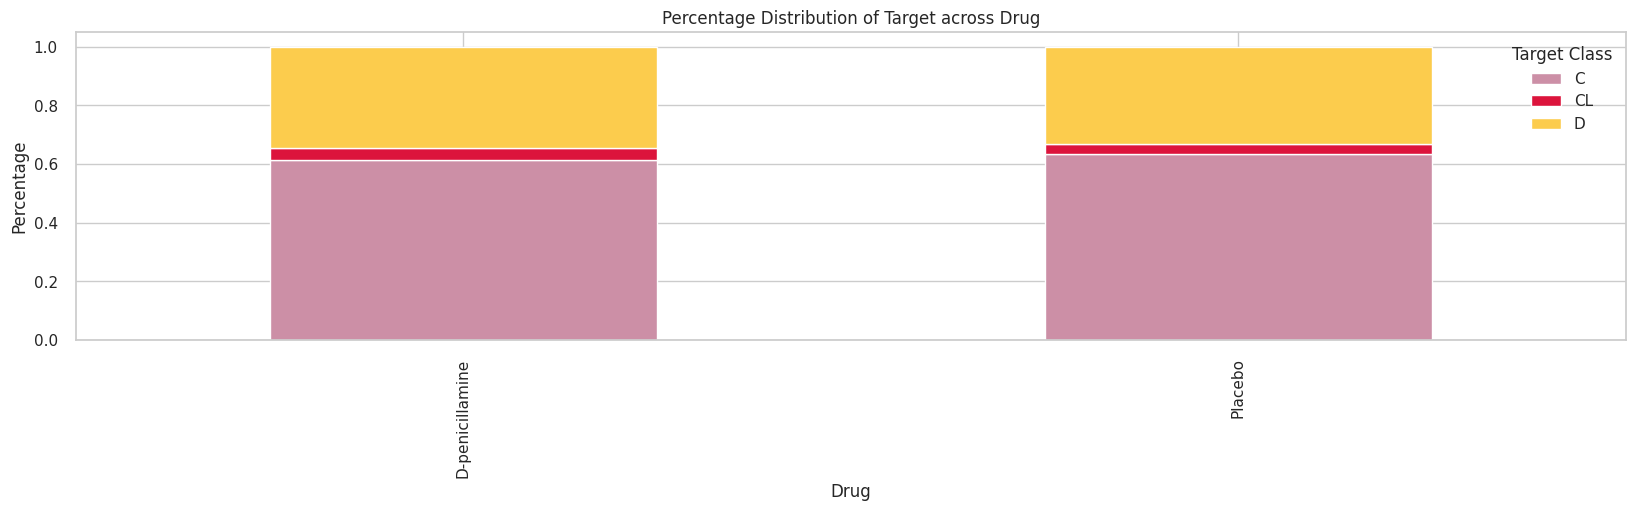

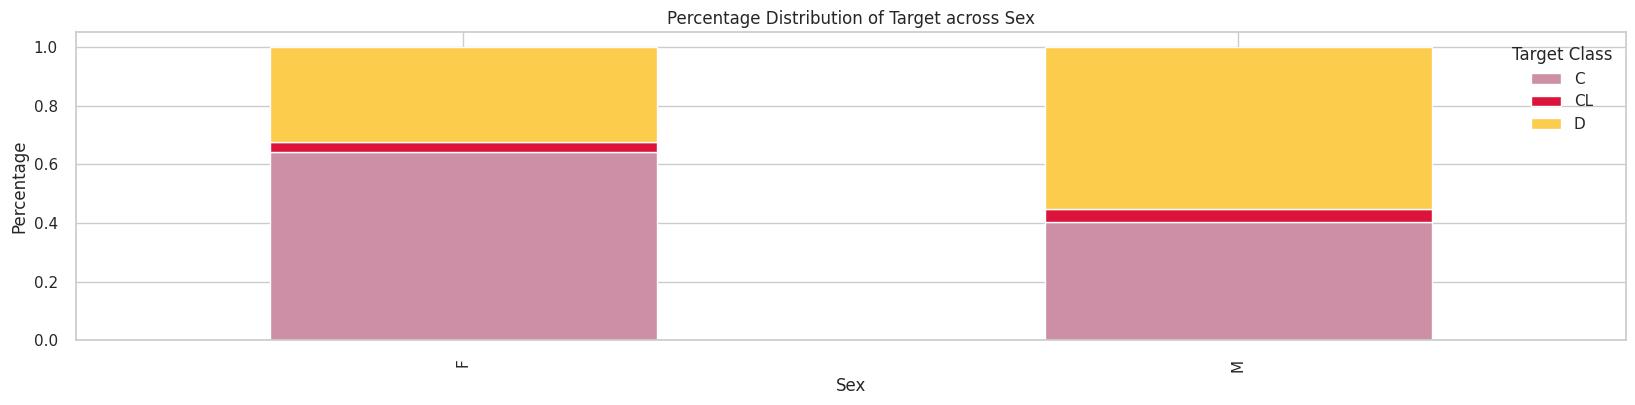

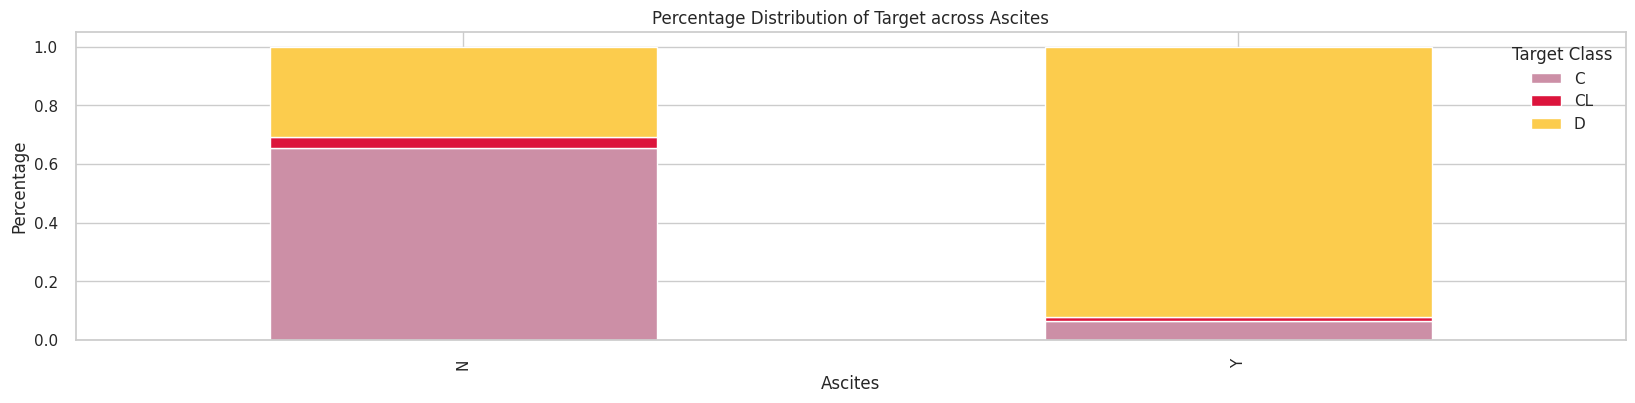

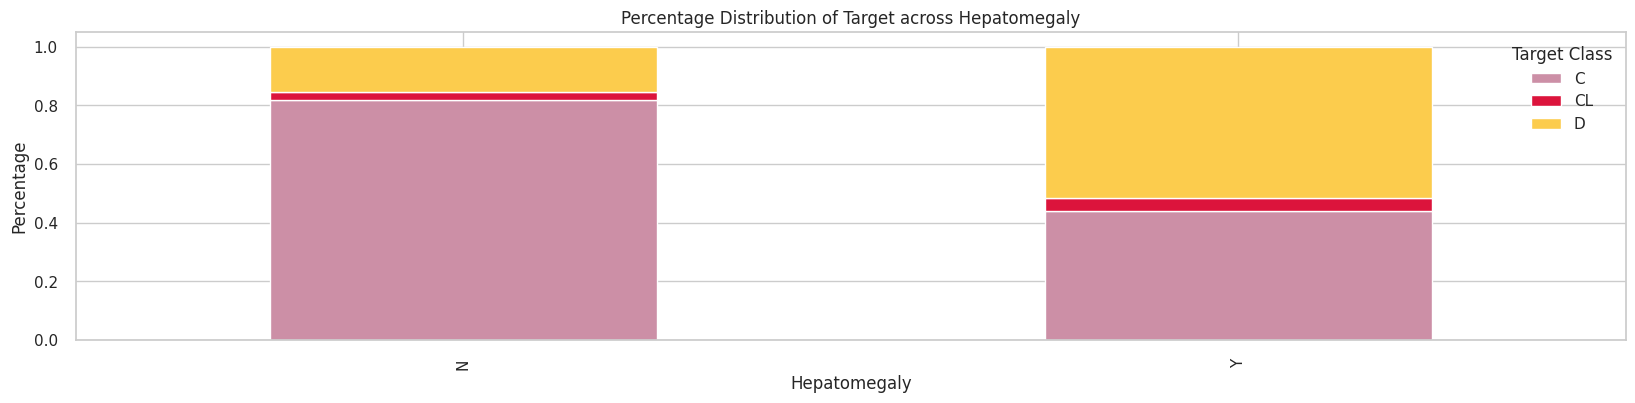

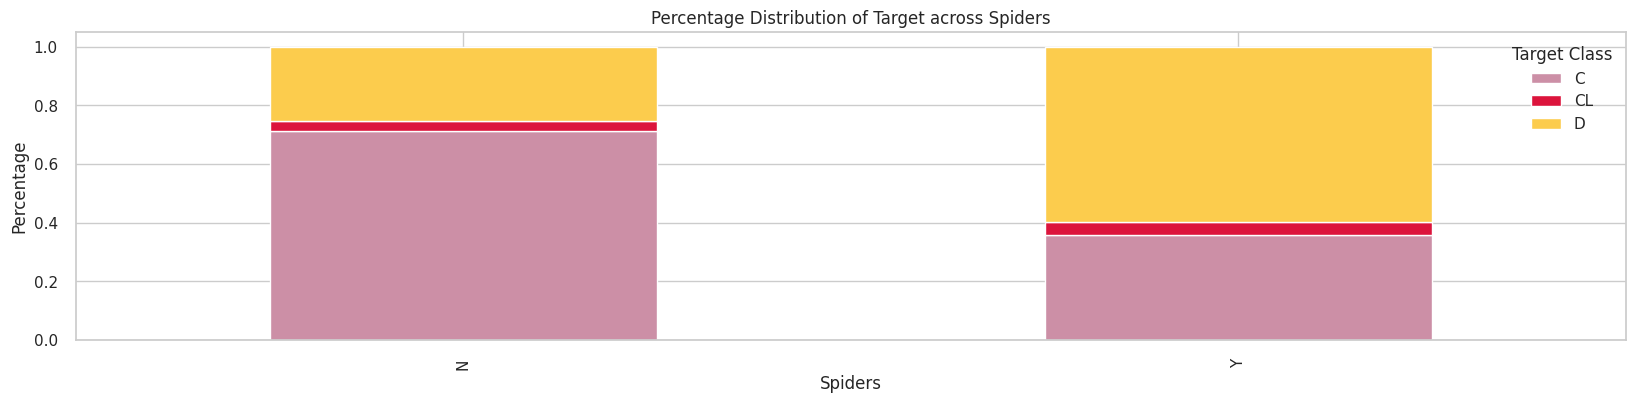

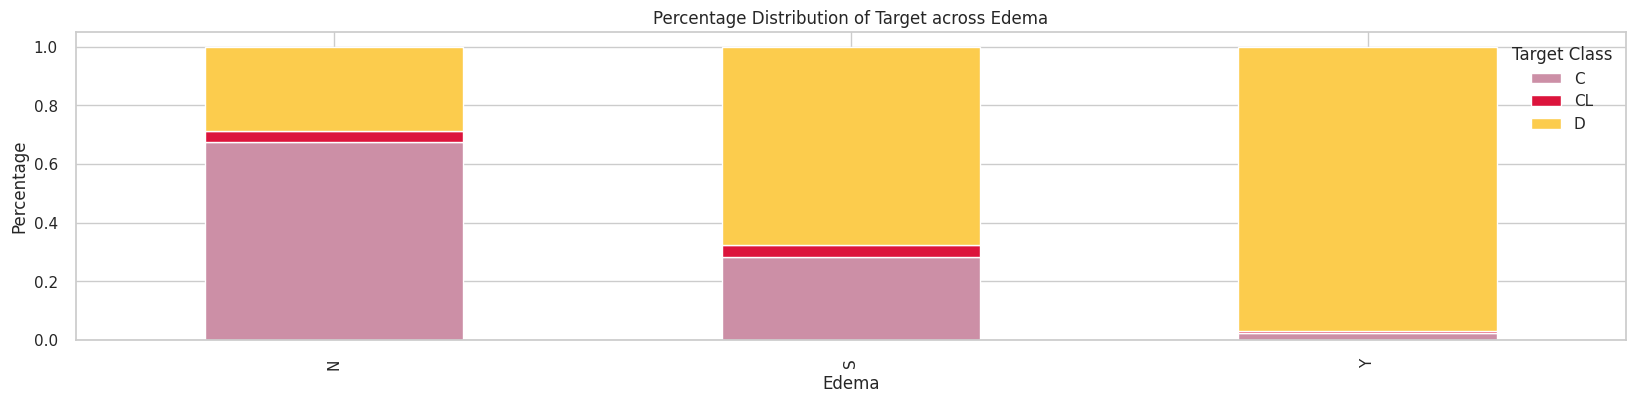

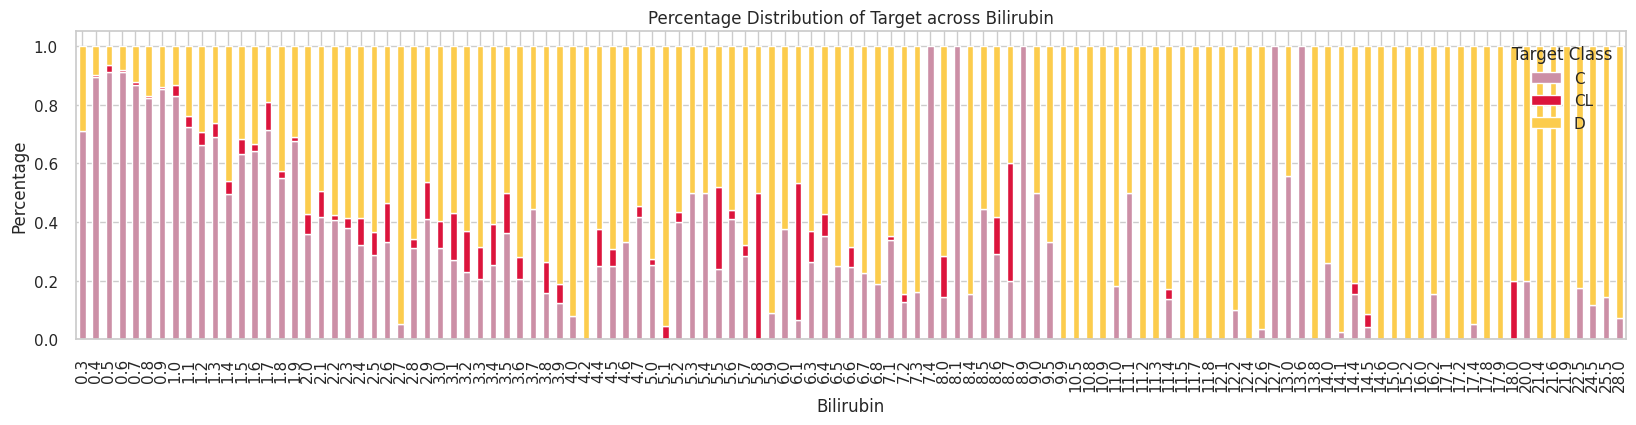

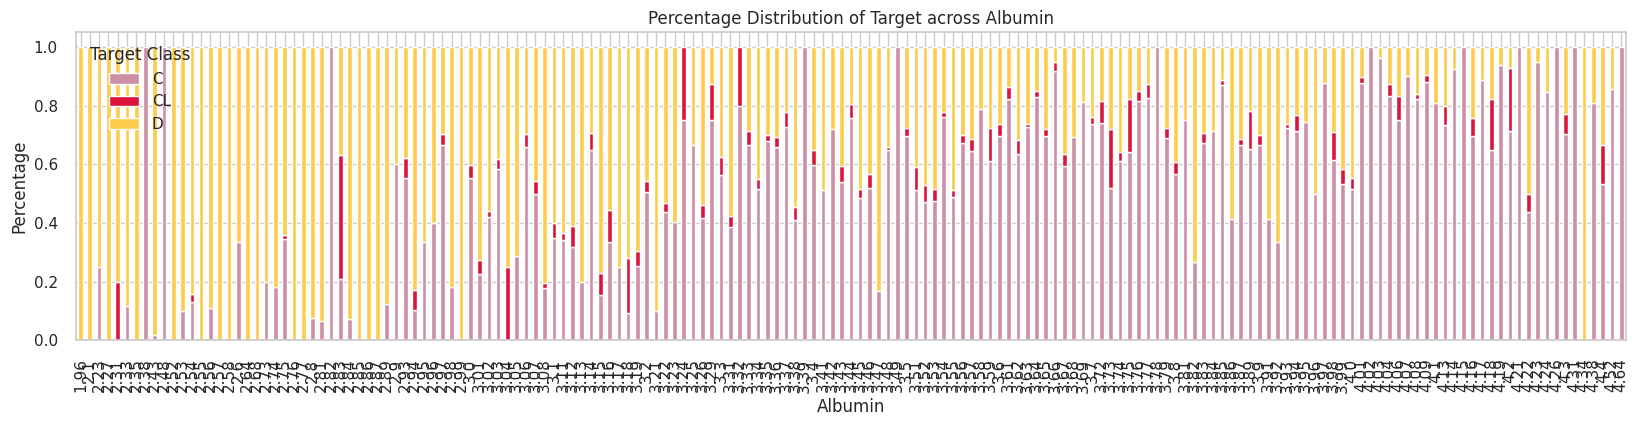

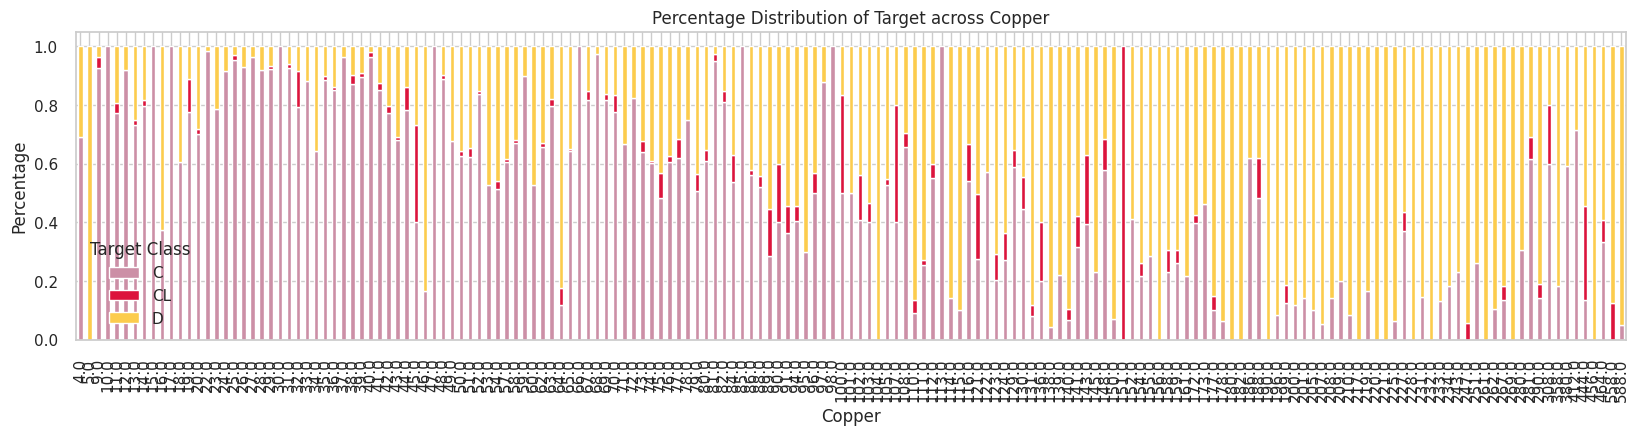

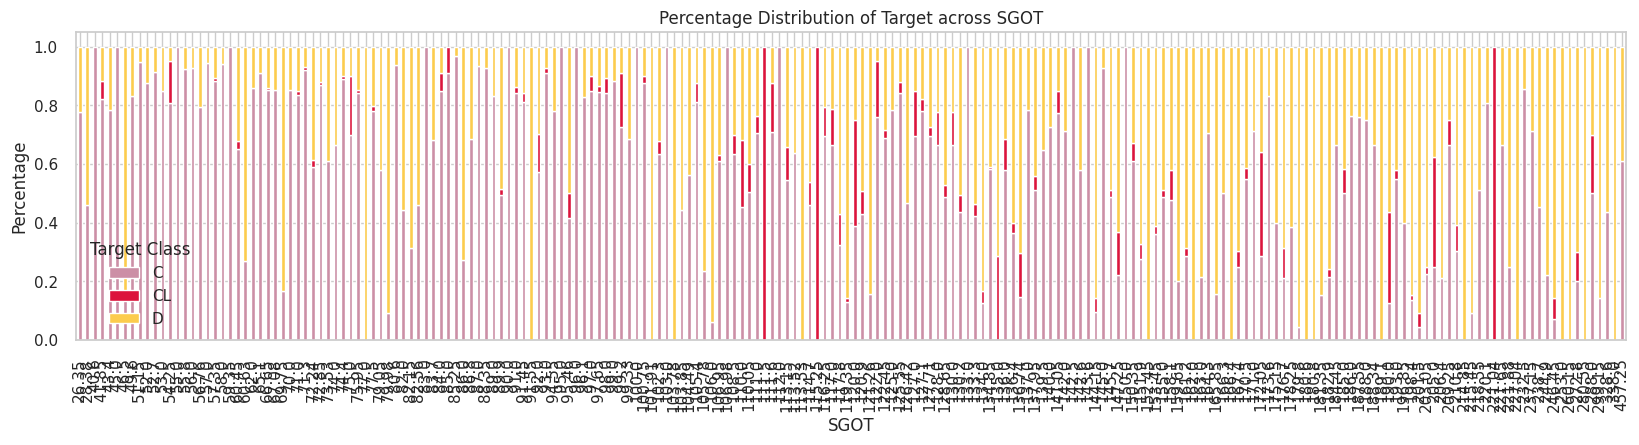

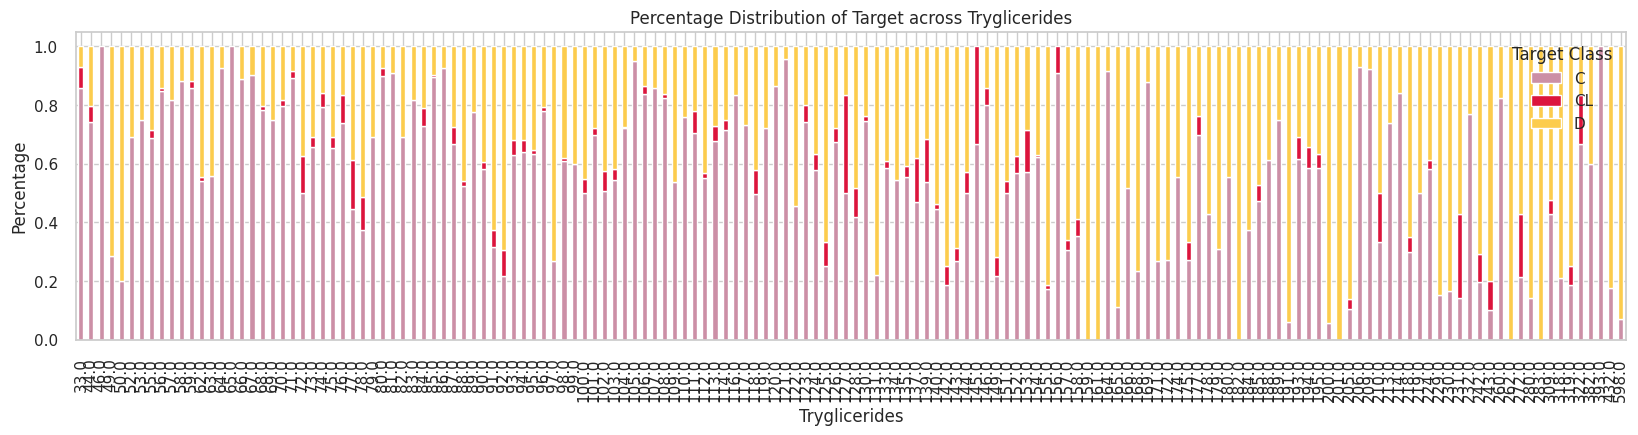

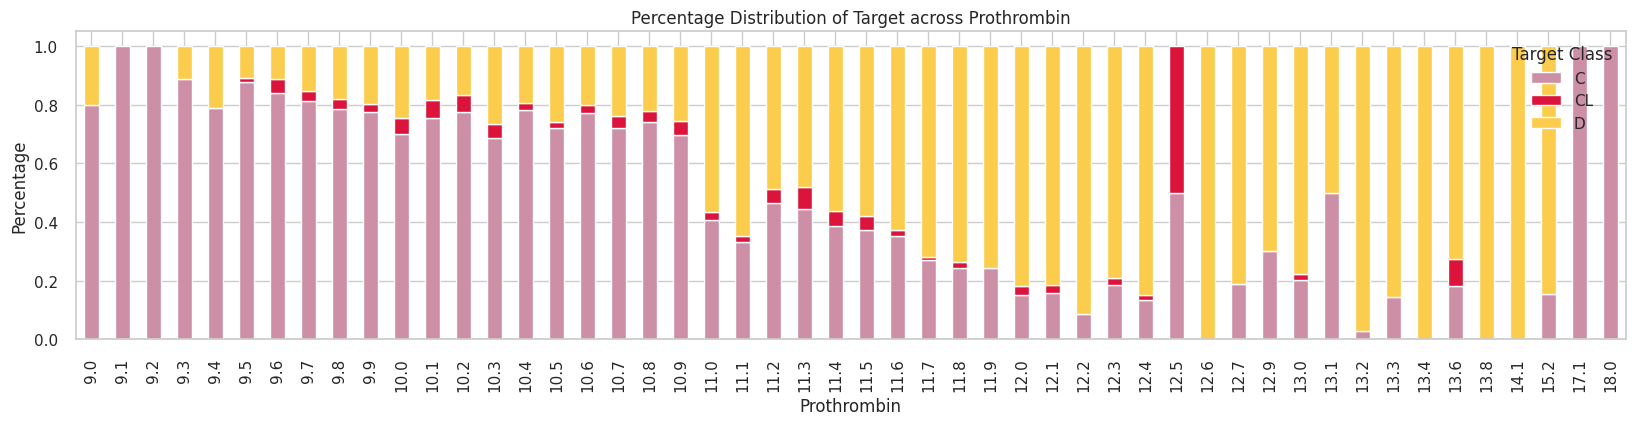

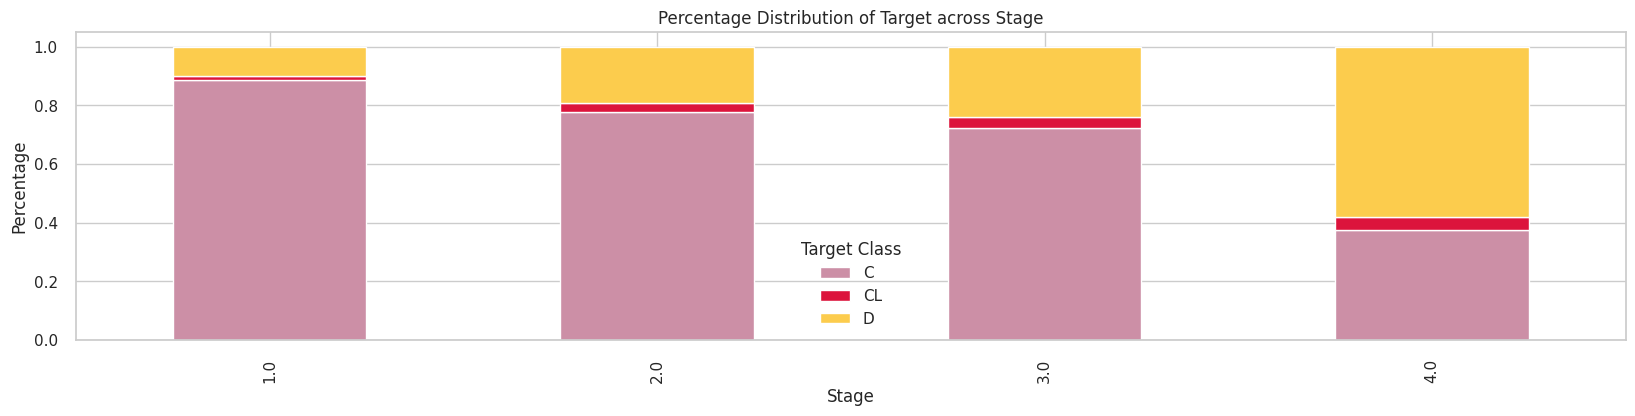

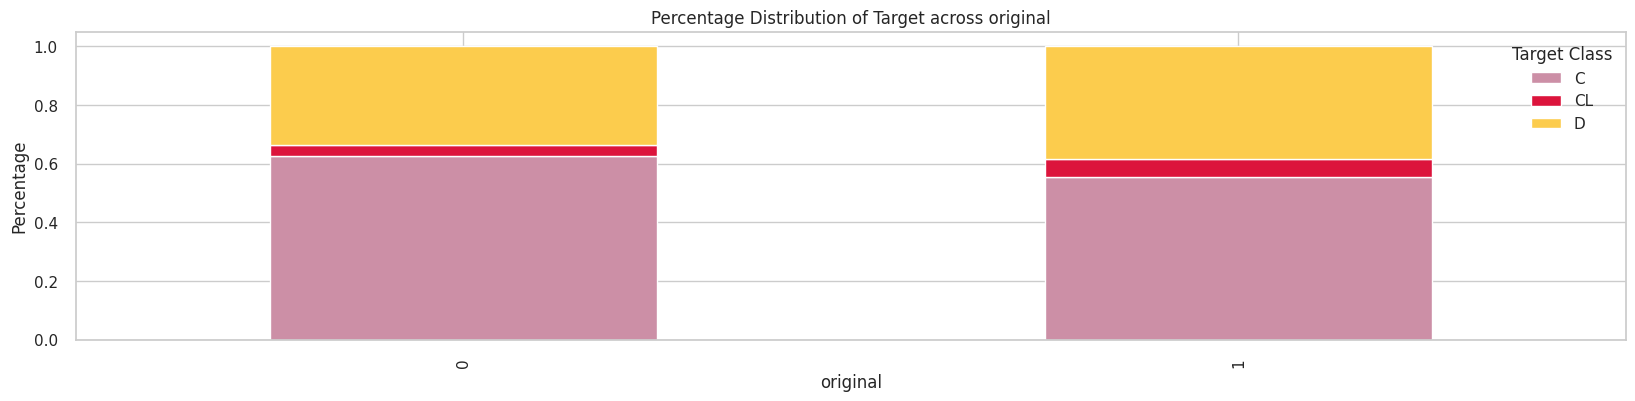

In [11]:
# Categorical

cat_cols = [f for f in train.columns if (train[f].dtype != 'O' and train[f].nunique() / train.shape[0] < 0.025) or (train[f].dtype == 'O' and f not in [target]) ]
custom_palette =(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)
for col in cat_cols:
    contingency_table = pd.crosstab(train[col], train[target], normalize='index')
    sns.set(style="whitegrid")
    contingency_table.plot(kind="bar", stacked=True, color=custom_palette,figsize=(20, 4))
    plt.title(f"Percentage Distribution of Target across {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.legend(title="Target Class")
    plt.show()


In [12]:
# Imputing missing Values

In [13]:
# categorical feature imputation


missing_cat=[f for f in train.columns if train[f].dtype=="O" and train[f].isna().sum()>0]
train_missing_pct = train[missing_cat].isnull().mean() * 100
test_missing_pct = test[missing_cat].isnull().mean() * 100

missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])
print(missing_pct_df)

               Train %  Test%
Drug          1.273579    0.0
Ascites       1.273579    0.0
Hepatomegaly  1.273579    0.0
Spiders       1.273579    0.0


In [14]:
cat_params={
            'depth': 6,
            'learning_rate': 0.1,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
}
def store_missing_rows(df, features):
    missing_rows = {}
    
    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]
    
    return missing_rows

def fill_missing_categorical(train, test, target, features, max_iterations=10):
    df = pd.concat([train.drop(columns=target), test], axis="rows")
    df = df.reset_index(drop=True)

    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)

    # Step 2: Initially fill all missing values with "Missing"
    for f in features:
        df[f] = df[f].fillna("Missing_" + f)

    for iteration in tqdm(range(max_iterations), desc="Iterations"):
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index

            missing_temp = df.loc[rows_miss].copy()
            non_missing_temp = df.drop(index=rows_miss).copy()
            missing_temp = missing_temp.drop(columns=[feature])

            other_features = [x for x in df.columns if x != feature and df[x].dtype == "O"]

            X_train = non_missing_temp.drop(columns=[feature])
            y_train = non_missing_temp[[feature]]

            catboost_classifier = CatBoostClassifier(**cat_params)
            catboost_classifier.fit(X_train, y_train, cat_features=other_features, verbose=False)

            # Step 4: Predict missing values for the feature and update all N features
            y_pred = catboost_classifier.predict(missing_temp)
            
            # Convert y_pred to strings if necessary
            if y_pred.dtype != "O":
                y_pred = y_pred.astype(str)

            df.loc[rows_miss, feature] = y_pred

    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train, test

train, test = fill_missing_categorical(train, test, target, missing_cat, 5)

Iterations: 100%|██████████| 5/5 [04:08<00:00, 49.76s/it]


In [15]:
# Numerical feature imutation

missing_num=[f for f in train.columns if train[f].dtype!="O" and train[f].isna().sum()>0]
train_missing_pct = train[missing_num].isnull().mean() * 100
test_missing_pct = test[missing_num].isnull().mean() * 100
missing_pct_df = pd.concat([train_missing_pct, test_missing_pct], axis=1, keys=['Train %', 'Test%'])
print(missing_pct_df)

                Train %  Test%
Cholesterol    1.609996    0.0
Copper         1.297609    0.0
Alk_Phos       1.273579    0.0
SGOT           1.273579    0.0
Tryglicerides  1.634026    0.0
Platelets      0.132164    0.0
Prothrombin    0.024030    0.0
Stage          0.072089    0.0


Iterations: 100%|██████████| 5/5 [36:52<00:00, 442.48s/it]


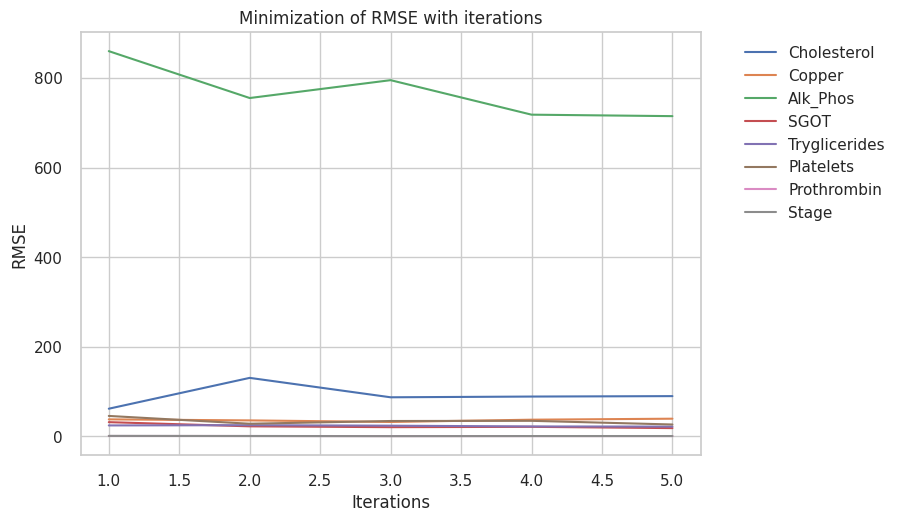

In [16]:
cb_params = {
            'iterations': 5000,
            'depth': 7,
            'learning_rate': 0.09,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 80,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'random_state': 422,
        }
lgb_params = {
            'n_estimators': 500,
            'max_depth': 9,
            'learning_rate': 0.091,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'boosting_type': 'gbdt',
            'random_state': 422,
        }
def rmse(y1,y2):
    return(np.sqrt(mean_squared_error(y1,y2)))

def fill_missing_numerical(train,test,target, features, max_iterations=10):
    train_temp=train.copy()
    if target in train_temp.columns:
        train_temp=train_temp.drop(columns=target)
        
    
    df=pd.concat([train_temp,test],axis="rows")
    df=df.reset_index(drop=True)
    
    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)
    
    # Step 2: Initially fill all missing values with "Missing"
    for f in features:
        df[f]=df[f].fillna(df[f].mean())
    
    cat_features=[f for f in df.columns if not pd.api.types.is_numeric_dtype(df[f])]
    dictionary = {feature: [] for feature in features}
    
    for iteration in tqdm(range(max_iterations), desc="Iterations"):
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index
            
            missing_temp = df.loc[rows_miss].copy()
            non_missing_temp = df.drop(index=rows_miss).copy()
            y_pred_prev=missing_temp[feature]
            missing_temp = missing_temp.drop(columns=[feature])
            
            
            # Step 3: Use the remaining features to predict missing values using Random Forests
            X_train = non_missing_temp.drop(columns=[feature])
            y_train = non_missing_temp[[feature]]
            
            catboost_classifier = CatBoostRegressor(**cb_params)
            catboost_classifier.fit(X_train, y_train,cat_features=cat_features, verbose=False)
            
            # Step 4: Predict missing values for the feature and update all N features
            y_pred = catboost_classifier.predict(missing_temp)
            df.loc[rows_miss, feature] = y_pred
            error_minimize=rmse(y_pred,y_pred_prev)
            dictionary[feature].append(error_minimize)  # Append the error_minimize value

    for feature, values in dictionary.items():
        iterations = range(1, len(values) + 1)  # x-axis values (iterations)
        plt.plot(iterations, values, label=feature)  # plot the values
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title('Minimization of RMSE with iterations')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test


train,test = fill_missing_numerical(train,test,target,missing_num,5)

In [17]:
# Feature Engineering

In [18]:
# Basic function:

target_map={
'C':0,
'CL':1,
'D':2}
    

def encode(y,target_map):
    '''
    To convert the outputs to numbers
    '''
    y=np.array(y)
    encoded_y=[target_map[f] for f in y]
    return encoded_y
def decode(y,target_map):
    '''To convert the predictions back to classes
    '''
    y=np.array(y)
    reverse_dict={v: k for k, v in target_map.items()}
    decoded_y=[reverse_dict[f] for f in y]
    return decoded_y
def min_max_scaler(train, test, column):
    '''
    Min Max just based on train might have an issue if test has extreme values, hence changing the denominator uding overall min and max
    '''
    sc=MinMaxScaler()
    
    max_val=max(train[column].max(),test[column].max())
    min_val=min(train[column].min(),test[column].min())

    train[column]=(train[column]-min_val)/(max_val-min_val)
    test[column]=(test[column]-min_val)/(max_val-min_val)
    
    return train,test  

def OHE(train_df,test_df,cols,target):
    '''
    Function for one hot encoding, it first combined the data so that no category is missed and
    the category with least frequency can be dropped because of redunancy
    '''
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]
    
    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe

In [19]:
# Numerical Transformations

cont_cols = [f for f in train.columns if pd.api.types.is_numeric_dtype(train[f]) and train[f].nunique() / train.shape[0] * 100 > 2.5]

sc=MinMaxScaler()

global unimportant_features
global overall_best_score
global overall_best_col
unimportant_features=[]
overall_best_score=100
overall_best_col='none'

for col in cont_cols:
     train, test=min_max_scaler(train, test, col)

def transformer(train, test,cont_cols, target):
    '''
    Algorithm applies multiples transformations on selected columns and finds the best transformation using a single variable model performance
    '''
    global unimportant_features
    global overall_best_score
    global overall_best_col
    train_copy = train.copy()
    test_copy = test.copy()
    table = PrettyTable()
    table.field_names = ['Feature', 'Original Log Loss', 'Transformation', 'Tranformed Log Loss']

    for col in cont_cols:
        
        for c in ["log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col]:
            if c in train_copy.columns:
                train_copy = train_copy.drop(columns=[c])
        
        # Log Transformation after MinMax Scaling (keeps data between 0 and 1)
        train_copy["log_"+col] = np.log1p(train_copy[col])
        test_copy["log_"+col] = np.log1p(test_copy[col])
        
        # Square Root Transformation
        train_copy["sqrt_"+col] = np.sqrt(train_copy[col])
        test_copy["sqrt_"+col] = np.sqrt(test_copy[col])
        
        # Box-Cox transformation
        combined_data = pd.concat([train_copy[[col]], test_copy[[col]]], axis=0)
        epsilon = 1e-5
        transformer = PowerTransformer(method='box-cox')
        scaled_data = transformer.fit_transform(combined_data + epsilon)

        train_copy["bx_cx_" + col] = scaled_data[:train_copy.shape[0]]
        test_copy["bx_cx_" + col] = scaled_data[train_copy.shape[0]:]
        # Yeo-Johnson transformation
        transformer = PowerTransformer(method='yeo-johnson')
        train_copy["y_J_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["y_J_"+col] = transformer.transform(test_copy[[col]])
        
        # Power transformation, 0.25
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow_"+col] = transformer.transform(test_copy[[col]])
        
        # Power transformation, 2
        power_transform = lambda x: np.power(x + 1 - np.min(x), 2)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow2_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow2_"+col] = transformer.transform(test_copy[[col]])
        
        # Log to power transformation
        train_copy["log_sqrt"+col] = np.log1p(train_copy["sqrt_"+col])
        test_copy["log_sqrt"+col] = np.log1p(test_copy["sqrt_"+col])
        
        temp_cols = [col, "log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col]
        
        train_copy[temp_cols] = train_copy[temp_cols].fillna(0)
        test_copy[temp_cols] = test_copy[temp_cols].fillna(0)
        
        pca = TruncatedSVD(n_components=1)
        x_pca_train = pca.fit_transform(train_copy[temp_cols])
        x_pca_test = pca.transform(test_copy[temp_cols])
        x_pca_train = pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
        x_pca_test = pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
        temp_cols.append(col+"_pca_comb")
        
        test_copy = test_copy.reset_index(drop=True)
        
        train_copy = pd.concat([train_copy, x_pca_train], axis='columns')
        test_copy = pd.concat([test_copy, x_pca_test], axis='columns')
        
        kf = KFold(n_splits=5, shuffle=True, random_state=422)
        
        ll_scores = []
        
        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].values
            
            log_loss_score = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
#                 model =   SVC(gamma="auto", probability=True, random_state=42)
                model =   CatBoostClassifier(**cat_params,verbose=False)
                model= lgb.LGBMClassifier(**lgb_params)

                model.fit(X_train, encode(y_train, target_map))
                y_pred = model.predict_proba(x_val)
#                 print(log_loss(encode(y_val, target_map),y_pred))
                log_loss_score.append(log_loss(encode(y_val, target_map),y_pred))
            ll_scores.append((f, np.mean(log_loss_score)))
            
            if overall_best_score > np.mean(log_loss_score):
                overall_best_score = np.mean(log_loss_score)
                overall_best_col = log_loss_score

            if f == col:
                orig_mae = np.mean(log_loss_score)
                
        best_col, best_loss = sorted(ll_scores, key=lambda x: x[1], reverse=False)[0]
        cols_to_drop = [f for f in temp_cols if f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        
        if cols_to_drop:
            unimportant_features = unimportant_features+cols_to_drop
        table.add_row([col,orig_mae,best_col ,best_loss])
    print(table)   
    print("overall best CV Log Loss score: ",overall_best_score)
    return train_copy, test_copy

train, test= transformer(train, test,cont_cols, target)


+---------------+--------------------+--------------------+---------------------+
|    Feature    | Original Log Loss  |   Transformation   | Tranformed Log Loss |
+---------------+--------------------+--------------------+---------------------+
|     N_Days    | 0.6289229456693153 |    bx_cx_N_Days    |  0.6273618450630847 |
|      Age      | 0.6951518933420351 |        Age         |  0.6951518933420351 |
|  Cholesterol  | 0.6622034220729069 |  y_J_Cholesterol   |  0.6612856683833793 |
|     Copper    | 0.6341892975447199 |     pow_Copper     |  0.6340332311566812 |
|    Alk_Phos   | 0.6726663542083336 |      Alk_Phos      |  0.6726663542083336 |
|      SGOT     | 0.6556633418117347 |      y_J_SGOT      |  0.6553853839365212 |
| Tryglicerides | 0.7069652724228204 | pow2_Tryglicerides |  0.706791982371466  |
|   Platelets   | 0.6723787351489919 |  bx_cx_Platelets   |  0.6717355633089825 |
+---------------+--------------------+--------------------+---------------------+
overall best CV 

In [20]:
# Categorical Encoding
cat_cols = [f for f in train.columns if (train[f].dtype != 'O' and train[f].nunique() / train.shape[0] < 0.025) or (train[f].dtype == 'O' and f not in [target]) ]


for col in cat_cols:
    if train[col].dtype=="O":
        train[col]=train[col].astype(str)+"_"+col
        test[col]=test[col].astype(str)+"_"+col

In [21]:

def cat_encoding(train, test, target):
    global overall_best_score
    global overall_best_col
    table = PrettyTable()
    table.field_names = ['Feature', 'Encoded Features', 'F1 Score']
    train_copy=train.copy()
    test_copy=test.copy()
    train_dum = train.copy()
    train_dum[target] = encode(train[target], target_map)
    for feature in cat_cols:
        print(feature)
        cat_labels = train_dum.groupby([feature])[target].mean().sort_values().index
        cat_labels2 = {k: i for i, k in enumerate(cat_labels, 0)}
        train_copy[feature + "_target"] = train[feature].map(cat_labels2)
        test_copy[feature + "_target"] = test[feature].map(cat_labels2)

        dic = train[feature].value_counts().to_dict()
        train_copy[feature + "_count"] =train[feature].map(dic)
        test_copy[feature + "_count"] = test[feature].map(dic)

        dic2=train[feature].value_counts().to_dict()
        list1=np.arange(len(dic2.values()),0,-1) # Higher rank for high count
        # list1=np.arange(len(dic2.values())) # Higher rank for low count
        dic3=dict(zip(list(dic2.keys()),list1))
        train_copy[feature+"_count_label"]=train[feature].replace(dic3).astype(float)
        test_copy[feature+"_count_label"]=test[feature].replace(dic3).astype(float)

        temp_cols = [feature + "_target", feature + "_count", feature + "_count_label"]

        
        if train_copy[feature].dtype=='O':
            train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
            train_copy=train_copy.drop(columns=[feature])
            test_copy=test_copy.drop(columns=[feature])
        else:
            if train_copy[feature].nunique()<15:
                train_copy[feature+"_OHE"]=train_copy[feature].astype(str)+"_"+feature
                test_copy[feature+"_OHE"]=test_copy[feature].astype(str)+"_"+feature
                train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
                train_copy=train_copy.drop(columns=[feature+"_OHE"])
                test_copy=test_copy.drop(columns=[feature+"_OHE"])
                temp_cols.append(feature)
            

        kf = KFold(n_splits=5, shuffle=True, random_state=422)

        ll_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].values

            log_loss_score = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =  lgb.LGBMClassifier(**lgb_params)

                model.fit(X_train, encode(y_train, target_map))
                y_pred = model.predict_proba(x_val)
                log_loss_score.append(log_loss(encode(y_val, target_map),y_pred))
                
            ll_scores.append((f, np.mean(log_loss_score)))
            if overall_best_score > np.mean(log_loss_score):
                overall_best_score = np.mean(log_loss_score)
                overall_best_col = f
        best_col, best_loss = sorted(ll_scores, key=lambda x: x[1], reverse=False)[0]

        corr = train_copy[temp_cols].corr(method='pearson')
        corr_with_best_col = corr[best_col]
        cols_to_drop = [f for f in temp_cols if corr_with_best_col[f] > 0.5 and f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        if cols_to_drop:
            train_copy = train_copy.drop(columns=cols_to_drop)
            test_copy = test_copy.drop(columns=cols_to_drop)

        table.add_row([feature, best_col, best_loss])

    print(table)
    print("overall best CV score: ", overall_best_score)
    return train_copy, test_copy

train, test= cat_encoding(train, test, target)


Drug
Sex
Ascites
Hepatomegaly
Spiders
Edema
Bilirubin
Albumin
Prothrombin
Stage
original
+--------------+---------------------+--------------------+
|   Feature    |   Encoded Features  |      F1 Score      |
+--------------+---------------------+--------------------+
|     Drug     |     Drug_target     | 0.7806971582284332 |
|     Sex      |      Sex_target     | 0.7732990776094205 |
|   Ascites    |    Ascites_target   | 0.7415949384266904 |
| Hepatomegaly | Hepatomegaly_target | 0.7007118260267731 |
|   Spiders    |    Spiders_target   | 0.7310293284702629 |
|    Edema     |     Edema_target    | 0.7226062968250205 |
|  Bilirubin   |   Bilirubin_target  | 0.6005254755230426 |
|   Albumin    |    Albumin_target   | 0.7161291696472277 |
| Prothrombin  |  Prothrombin_target | 0.6814968574331092 |
|    Stage     |     Stage_target    | 0.7070673009834241 |
|   original   |   original_target   | 0.7805605558192263 |
+--------------+---------------------+--------------------+
overall bes

In [22]:
# Clustering 

In [23]:
table = PrettyTable()
table.field_names = ['Clustered Feature', 'Log Loss (CV-TRAIN)']
for col in cont_cols:
    sub_set=[f for f in unimportant_features if col in f]
    temp_train=train[sub_set]
    temp_test=test[sub_set]
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    model = KMeans()

    # print(ideal_clusters)
    kmeans = KMeans(n_clusters=25)
    kmeans.fit(np.array(temp_train))
    labels_train = kmeans.labels_

    train[col+"_unimp_cluster_WOE"] = labels_train
    test[col+"_unimp_cluster_WOE"] = kmeans.predict(np.array(temp_test))

    
    kf=KFold(n_splits=5, shuffle=True, random_state=422)
    
    X=train[[col+"_unimp_cluster_WOE"]].values
    y=train[target].values

    log_loss_score=[]
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]
        model =  lgb.LGBMClassifier(**lgb_params)

        model.fit(X_train, encode(y_train, target_map))
        y_pred = model.predict_proba(x_val)
        log_loss_score.append(log_loss(encode(y_val, target_map),y_pred))

        
    table.add_row([col+"_unimp_cluster_WOE",np.mean(log_loss_score)])
    if overall_best_score>np.mean(log_loss_score):
        overall_best_score=np.mean(log_loss_score)
        overall_best_col=col+"_unimp_cluster_WOE"

print(table)
print("overall best CV score: ", overall_best_score)


+---------------------------------+---------------------+
|        Clustered Feature        | Log Loss (CV-TRAIN) |
+---------------------------------+---------------------+
|     N_Days_unimp_cluster_WOE    |  0.6540553644029267 |
|      Age_unimp_cluster_WOE      |  0.7366501337617928 |
|  Cholesterol_unimp_cluster_WOE  |  0.7366562711448594 |
|     Copper_unimp_cluster_WOE    |  0.6588163944734112 |
|    Alk_Phos_unimp_cluster_WOE   |  0.7302399189210146 |
|      SGOT_unimp_cluster_WOE     |  0.7128268477452306 |
| Tryglicerides_unimp_cluster_WOE |  0.7437399624842423 |
|   Platelets_unimp_cluster_WOE   |  0.7449720141727483 |
+---------------------------------+---------------------+
overall best CV score:  0.6005254755230426


Iterations: 100%|██████████| 3/3 [1:21:55<00:00, 1638.54s/it]


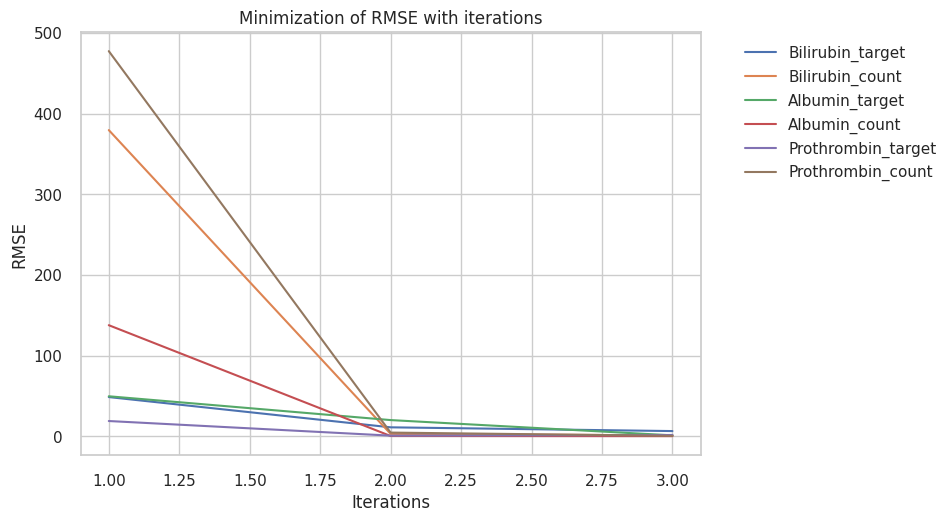

In [24]:
missing_num = [f for f in test.columns if (test[f].isna().sum() > 0).any()]
train,test = fill_missing_numerical(train,test,target,missing_num,3)

In [25]:
# Arithmetic new features

In [26]:
def better_features(train, test, target, cols, best_score):
    new_cols = []
    skf = KFold(n_splits=5, shuffle=True, random_state=422)  # Stratified k-fold object
    best_list=[]
    for i in tqdm(range(len(cols)), desc='Generating Columns'):
        col1 = cols[i]
        temp_df = pd.DataFrame()  # Temporary dataframe to store the generated columns
        temp_df_test = pd.DataFrame()  # Temporary dataframe for test data

        for j in range(i+1, len(cols)):
            col2 = cols[j]
            # Multiply
            temp_df[col1 + '*' + col2] = train[col1] * train[col2]
            temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]

            # Divide (col1 / col2)
            temp_df[col1 + '/' + col2] = train[col1] / (train[col2] + 1e-5)
            temp_df_test[col1 + '/' + col2] = test[col1] / (test[col2] + 1e-5)

            # Divide (col2 / col1)
            temp_df[col2 + '/' + col1] = train[col2] / (train[col1] + 1e-5)
            temp_df_test[col2 + '/' + col1] = test[col2] / (test[col1] + 1e-5)

            # Subtract
            temp_df[col1 + '-' + col2] = train[col1] - train[col2]
            temp_df_test[col1 + '-' + col2] = test[col1] - test[col2]

            # Add
            temp_df[col1 + '+' + col2] = train[col1] + train[col2]
            temp_df_test[col1 + '+' + col2] = test[col1] + test[col2]

        SCORES = []
        for column in temp_df.columns:
            scores = []
            for train_index, val_index in skf.split(train, train[target]):
                X_train, X_val = temp_df[column].iloc[train_index].values.reshape(-1, 1), temp_df[column].iloc[val_index].values.reshape(-1, 1)
                y_train, y_val = train[target].iloc[train_index], train[target].iloc[val_index]
                model = lgb.LGBMClassifier(**lgb_params)
                model.fit(X_train, encode(y_train, target_map))
                y_pred = model.predict_proba(X_val)
                scores.append(log_loss(encode(y_val, target_map),y_pred))
            mean_score = np.mean(scores)
            SCORES.append((column, mean_score))

        if SCORES:
            best_col, best_loss = sorted(SCORES, key=lambda x: x[1],reverse=False)[0]
            corr_with_other_cols = train.drop([target] + new_cols, axis=1).corrwith(temp_df[best_col])
            if (corr_with_other_cols.abs().max() < 0.9 or best_loss < best_score) and corr_with_other_cols.abs().max() !=1 :
                train[best_col] = temp_df[best_col]
                test[best_col] = temp_df_test[best_col]
                new_cols.append(best_col)
                print(f"Added column '{best_col}' with Log Loss Score: {best_loss:.4f} & Correlation {corr_with_other_cols.abs().max():.4f}")

    return train, test, new_cols

In [27]:
# selected_features=[f for f in test.columns if f not in unimportant_features and test[f].nunique()>2]
# train, test,new_cols=better_features(train, test, target, selected_features, overall_best_score)

In [28]:
new_cols=['Bilirubin*Prothrombin_target',
 'Albumin/Bilirubin_target',
 'Copper+Bilirubin_target',
 'SGOT+Bilirubin_target',
 'Prothrombin*Bilirubin_target',
 'bx_cx_N_Days*Bilirubin_target',
 'pow2_Age*Bilirubin_target',
 'log_Cholesterol+Bilirubin_target',
 'Alk_Phos_pca_comb+Bilirubin_target',
 'bx_cx_Tryglicerides-Bilirubin_target',
 'bx_cx_Platelets-Bilirubin_target',
 'Bilirubin_target/Edema_target',
 'Edema_count-Bilirubin_target',
 'Bilirubin_target/Edema_count_label',
 'Bilirubin_target*Prothrombin_target',
 'Prothrombin_target/Bilirubin_count',
 'Bilirubin_count_label/Stage_target',
 'Albumin_target*Prothrombin_target',
 'Stage_target/Albumin_count',
 'Prothrombin_target/Albumin_count_label',
 'Stage_target/Prothrombin_count',
 'Prothrombin_count_label/Stage_target',
 'Stage_target/Copper_unimp_cluster_WOE',
 'N_Days_unimp_cluster_WOE/Copper_unimp_cluster_WOE',
 'Copper_unimp_cluster_WOE/Age_unimp_cluster_WOE',
 'Cholesterol_unimp_cluster_WOE/Copper_unimp_cluster_WOE',
 'SGOT_unimp_cluster_WOE/Copper_unimp_cluster_WOE',
 'Alk_Phos_unimp_cluster_WOE/SGOT_unimp_cluster_WOE',
 'SGOT_unimp_cluster_WOE/Tryglicerides_unimp_cluster_WOE',
 'Platelets_unimp_cluster_WOE/Tryglicerides_unimp_cluster_WOE']

In [29]:
def apply_arithmetic_operations(train_df, test_df, expressions_list):
    for expression in expressions_list:
        if expression not in train_df.columns:
            # Split the expression based on operators (+, -, *, /)
            parts = expression.split('+') if '+' in expression else \
                    expression.split('-') if '-' in expression else \
                    expression.split('*') if '*' in expression else \
                    expression.split('/')

            # Get the DataFrame column names involved in the operation
            cols = [col for col in parts]

            # Perform the corresponding arithmetic operation based on the operator in the expression
            if cols[0] in train_df.columns and cols[1] in train_df.columns:
                if '+' in expression:
                    train_df[expression] = train_df[cols[0]] + train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] + test_df[cols[1]]
                elif '-' in expression:
                    train_df[expression] = train_df[cols[0]] - train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] - test_df[cols[1]]
                elif '*' in expression:
                    train_df[expression] = train_df[cols[0]] * train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] * test_df[cols[1]]
                elif '/' in expression:
                    train_df[expression] = train_df[cols[0]] / (train_df[cols[1]]+1e-5)
                    test_df[expression] = test_df[cols[0]] /( test_df[cols[1]]+1e-5)
    
    return train_df, test_df

train, test = apply_arithmetic_operations(train, test, new_cols)

In [30]:
# Feature Elimination:

In [31]:
first_drop=[ f for f in unimportant_features if f in train.columns]
train=train.drop(columns=first_drop)
test=test.drop(columns=first_drop)

In [32]:
final_drop_list=[]


table = PrettyTable()
table.field_names = ['Original', 'Final Transformation', 'Log Loss CV']
threshold=0.95
# It is possible that multiple parent features share same child features, so store selected features to avoid selecting the same feature again
best_cols=[]

for col in cont_cols:
    sub_set=[f for f in train.columns if (str(col) in str(f)) and (train[f].nunique()>2)]
#     print(sub_set)
    if len(sub_set)>2:
        correlated_features = []

        for i, feature in enumerate(sub_set):
            # Check correlation with all remaining features
            for j in range(i+1, len(sub_set)):
                correlation = np.abs(train[feature].corr(train[sub_set[j]]))
                # If correlation is greater than threshold, add to list of highly correlated features
                if correlation > threshold:
                    correlated_features.append(sub_set[j])

        # Remove duplicate features from the list
        correlated_features = list(set(correlated_features))
#         print(correlated_features)
        if len(correlated_features)>=2:

            temp_train=train[correlated_features]
            temp_test=test[correlated_features]
            #Scale before applying PCA
            sc=StandardScaler()
            temp_train=sc.fit_transform(temp_train)
            temp_test=sc.transform(temp_test)

            # Initiate PCA
            pca=TruncatedSVD(n_components=1)
            x_pca_train=pca.fit_transform(temp_train)
            x_pca_test=pca.transform(temp_test)
            x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_final"])
            x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_final"])
            train=pd.concat([train,x_pca_train],axis='columns')
            test=pd.concat([test,x_pca_test],axis='columns')

            # Clustering
            model = KMeans()
            kmeans = KMeans(n_clusters=10)
            kmeans.fit(np.array(temp_train))
            labels_train = kmeans.labels_

            train[col+'_final_cluster'] = labels_train
            test[col+'_final_cluster'] = kmeans.predict(np.array(temp_test))


            correlated_features=correlated_features+[col+"_pca_comb_final",col+"_final_cluster"]

            # See which transformation along with the original is giving you the best univariate fit with target
            kf=KFold(n_splits=5, shuffle=True, random_state=422)

            scores=[]

            for f in correlated_features:
                X=train[[f]].values
                y=train[target].values

                log_loss_score=[]
                for train_idx, val_idx in kf.split(X,y):
                    X_train,y_train=X[train_idx],y[train_idx]
                    X_val,y_val=X[val_idx],y[val_idx]
                    model = lgb.LGBMClassifier(**lgb_params)
                    model.fit(X_train, encode(y_train, target_map))
                    y_pred = model.predict_proba(x_val)
                    log_loss_score.append(log_loss(encode(y_val, target_map),y_pred))
                if f not in best_cols:
                    scores.append((f,np.mean(log_loss_score)))
            best_col, best_loss=sorted(scores, key=lambda x:x[1], reverse=False)[0]
            best_cols.append(best_col)

            cols_to_drop = [f for f in correlated_features if  f not in best_cols]
            if cols_to_drop:
                final_drop_list=final_drop_list+cols_to_drop
            table.add_row([col,best_col ,best_loss])

print(table)      

+----------+----------------------+-------------+
| Original | Final Transformation | Log Loss CV |
+----------+----------------------+-------------+
+----------+----------------------+-------------+


In [33]:
final_drop_list=[*set(final_drop_list)]
train=train.drop(columns=final_drop_list)
test=test.drop(columns=final_drop_list)

In [34]:
# Feature Selection:

In [35]:
final_features=[f for f in train.columns if f not in [target]]
final_features=[*set(final_features)]

sc=StandardScaler()

train_scaled=train.copy()
test_scaled=test.copy()
train_scaled[final_features]=sc.fit_transform(train[final_features])
test_scaled[final_features]=sc.transform(test[final_features])

In [36]:
def post_processor(train, test):
    cols=train.drop(columns=[target]).columns
    train_cop=train.copy()
    test_cop=test.copy()
    drop_cols=[]
    for i, feature in enumerate(cols):
        for j in range(i+1, len(cols)):
            if sum(abs(train_cop[feature]-train_cop[cols[j]]))==0:
                if cols[j] not in drop_cols:
                    drop_cols.append(cols[j])
    print(drop_cols)
    train_cop.drop(columns=drop_cols,inplace=True)
    test_cop.drop(columns=drop_cols,inplace=True)
    
    return train_cop, test_cop

                    
train_cop, test_cop=   post_processor(train_scaled, test_scaled)            

['F_SexSex', 'Y_HepatomegalyHepatomegaly', 'N_SpidersSpiders', '0original']


In [37]:
X_train = train_cop.drop(columns=[target])
y_train = train[target]

X_test = test_cop.copy()

print(X_train.shape, X_test.shape)

(8323, 91) (5271, 91)


In [38]:
def get_most_important_features(X_train, y_train, n,model_input):
    xgb_params = {
            'n_estimators': 2000,
            'learning_rate': 0.0357,
            'max_depth': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'mlogloss',
            'objective': 'multi:softprob',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 422,
        }
    lgb_params = {
            'n_estimators': 2000,
            'max_depth': 8,
            'learning_rate': 0.0357,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'boosting_type': 'gbdt',
            'random_state': 422,
        }
    cb_params = {
            'iterations': 2000,
            'depth': 8,
            'learning_rate': 0.091,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
            'random_state': 422,
        }
    if 'xgb' in model_input:
        model = xgb.XGBClassifier(**xgb_params)
    elif 'cat' in model_input:
        model=CatBoostClassifier(**cb_params)
    else:
        model=lgb.LGBMClassifier(**lgb_params)
        
    kfold = KFold(n_splits=5, shuffle=True, random_state=422)
    f1_scores = []
    feature_importances_list = []
    
    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, encode(y_train_fold,target_map), verbose=False)
        
        y_pred = model.predict(X_val_fold)
        f1_scores.append(f1_score(encode(y_val_fold,target_map), y_pred, average='micro'))
        feature_importances = model.feature_importances_
        feature_importances_list.append(feature_importances)

    avg_f1 = np.mean(f1_scores)
    avg_feature_importances = np.mean(feature_importances_list, axis=0)

    feature_importance_list = [(X_train.columns[i], importance) for i, importance in enumerate(avg_feature_importances)]
    sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
    top_n_features = [feature[0] for feature in sorted_features[:n]]

    display_features=top_n_features[:25]
    
    sns.set_palette([(0.8, 0.56, 0.65)])
    plt.figure(figsize=(8, 15))
    plt.barh(range(len(display_features)), [avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features])
    plt.yticks(range(len(display_features)), display_features, fontsize=12)
    plt.xlabel('Average Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=10)
    plt.title(f'Top {25} of {n} Feature Importances with best F1 score {avg_f1}', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Add data labels on the bars
    for index, value in enumerate([avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features]):
        plt.text(value + 0.005, index, f'{value:.3f}', fontsize=12, va='center')

    plt.tight_layout()
    plt.show()

    return top_n_features


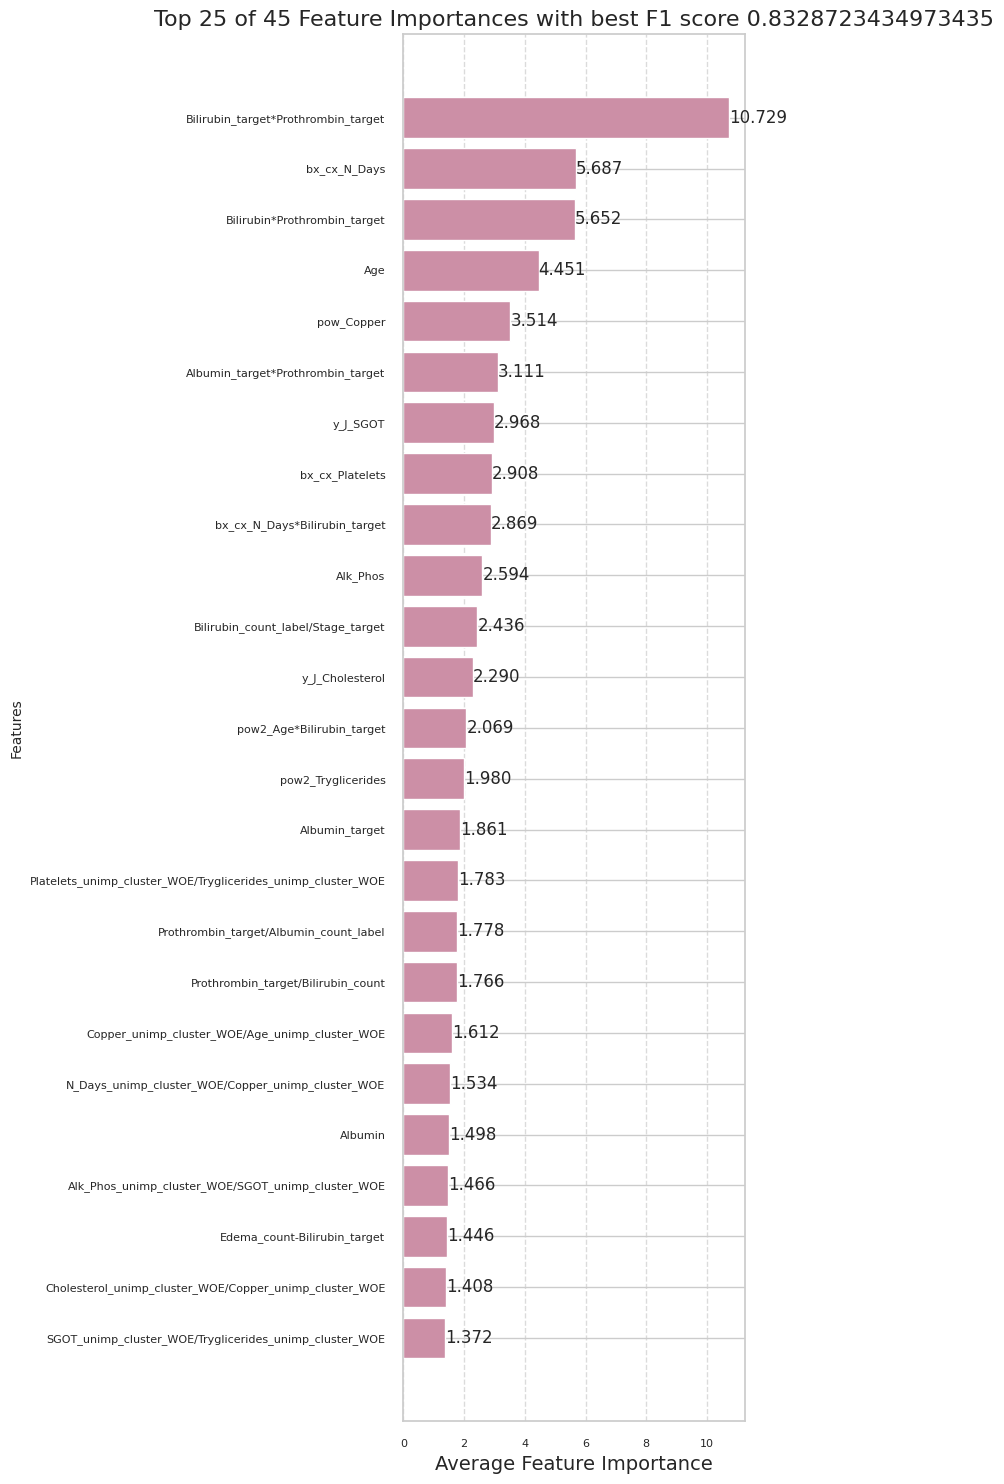

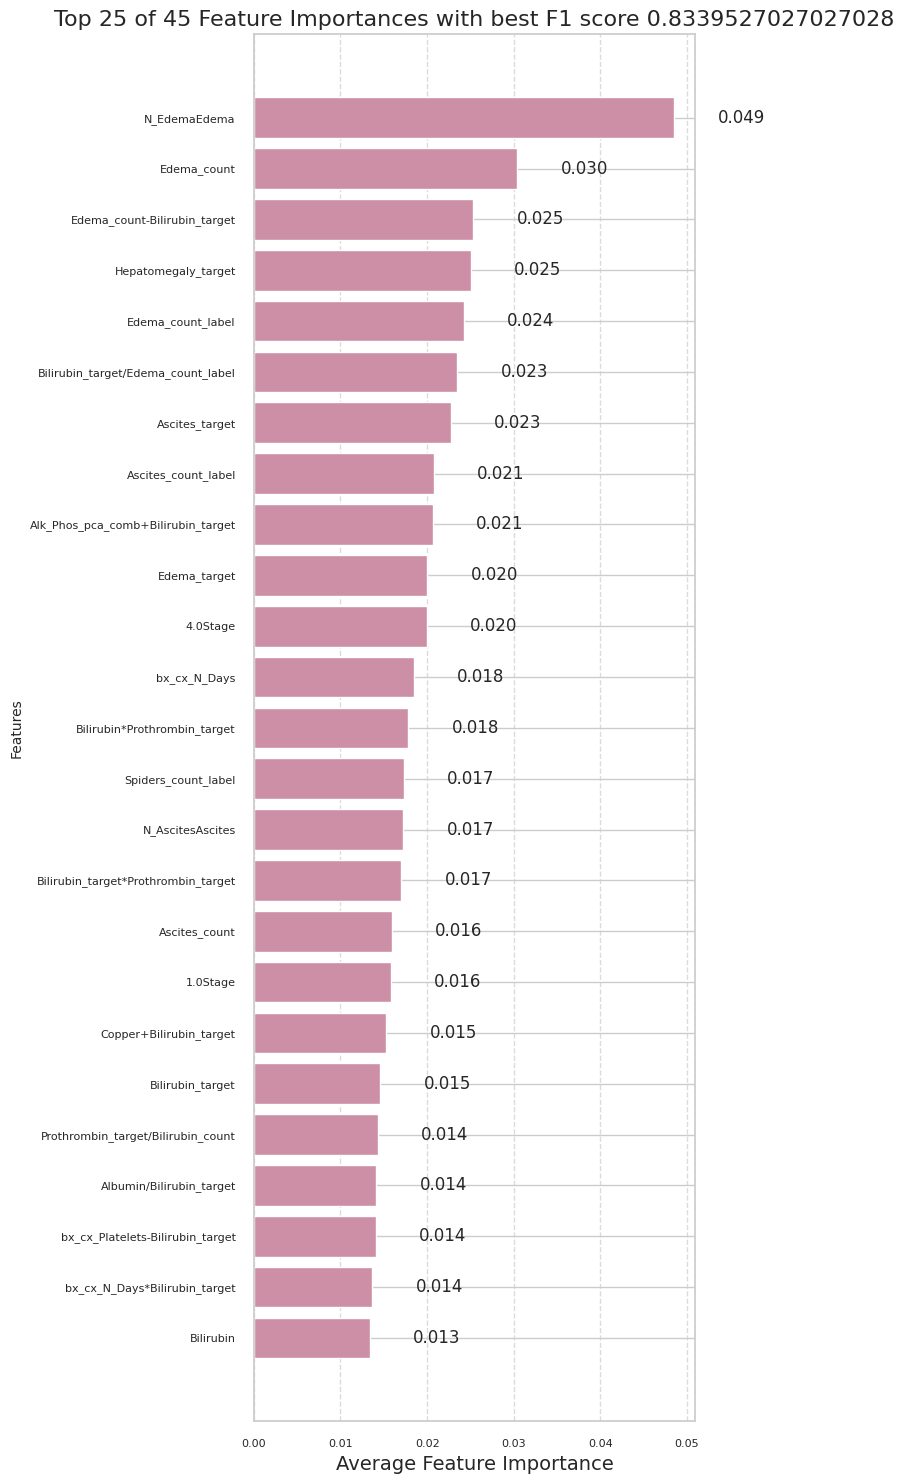

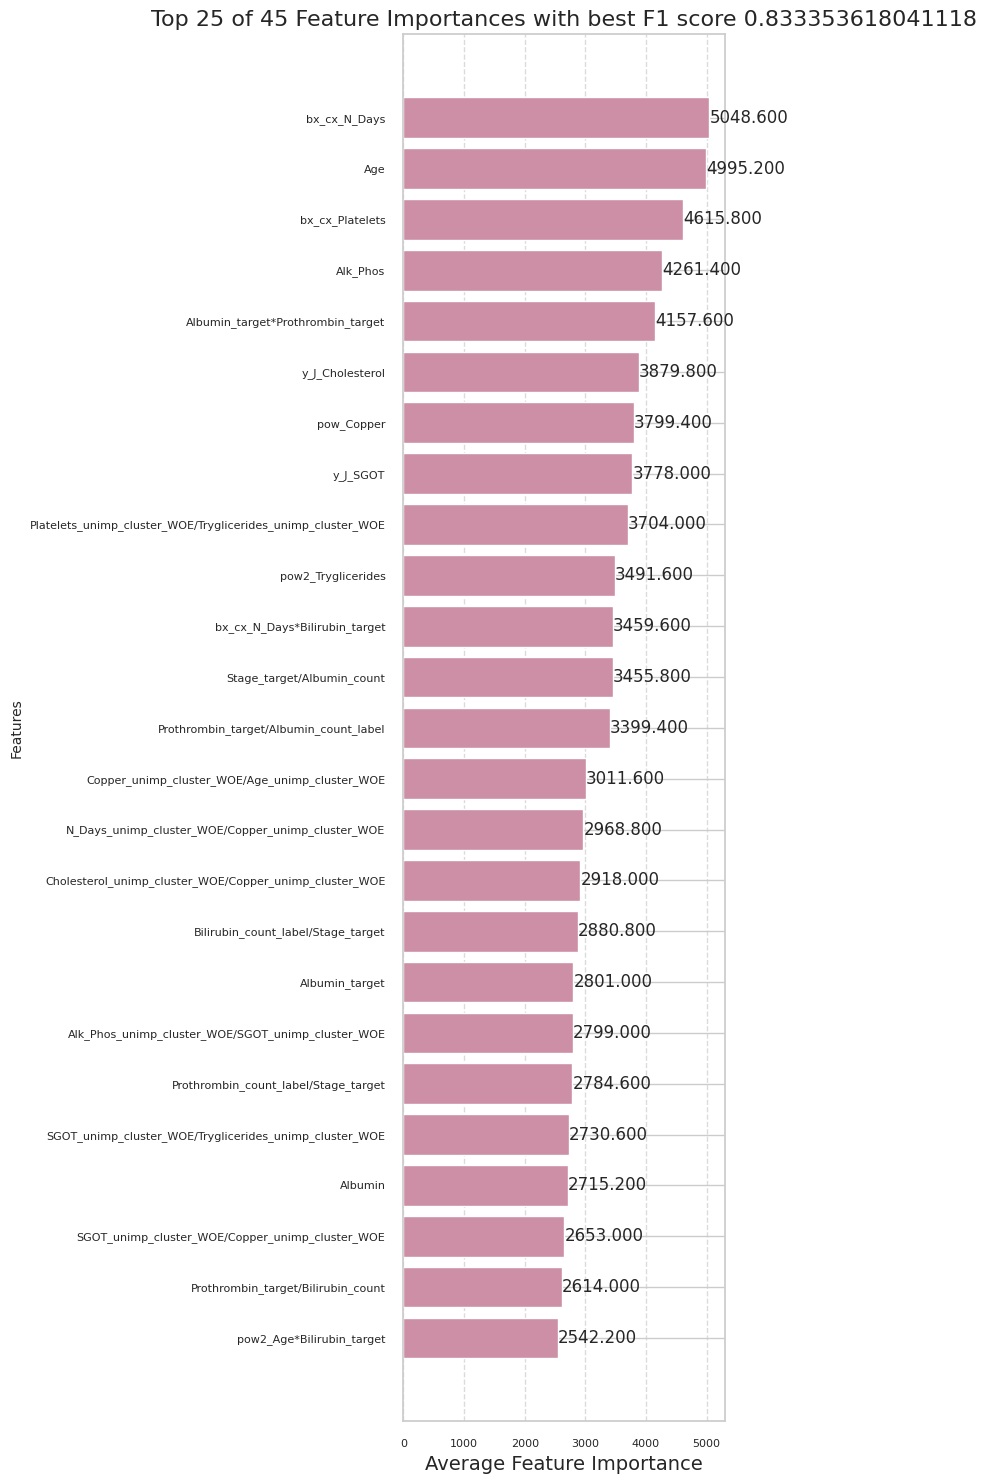

In [39]:
n_imp_features_cat=get_most_important_features(X_train.reset_index(drop=True), y_train,45, 'cat')
n_imp_features_xgb=get_most_important_features(X_train.reset_index(drop=True), y_train,45, 'xgb')
n_imp_features_lgbm=get_most_important_features(X_train.reset_index(drop=True), y_train,45, 'lgbm')

In [40]:
n_imp_features=[*set(n_imp_features_xgb+n_imp_features_lgbm+n_imp_features_cat)]
print(f"{len(n_imp_features)} features have been selected from three algorithms for the final model")

72 features have been selected from three algorithms for the final model


In [41]:
X_train=X_train[n_imp_features]
X_test=X_test[n_imp_features]

In [42]:
# Modeling

In [43]:
# Class weights:

classes = np.unique(y_train)  # Get unique class labels
class_to_index = {cls: idx for idx, cls in enumerate(classes)}
y_train_numeric = np.array([class_to_index[cls] for cls in y_train])

class_counts = np.bincount(y_train_numeric)

total_samples = len(y_train_numeric)

class_weights = total_samples / (len(classes) * class_counts)

class_weights_dict = {target_map[cls]: weight for cls, weight in zip(classes, class_weights)}

print("Class counts:", class_counts)
print("Total samples:", total_samples)
print("Class weights:", class_weights)
print("Class weights dictionary:", class_weights_dict)

Class counts: [5197  300 2826]
Total samples: 8323
Class weights: [0.53383362 9.24777778 0.98171739]
Class weights dictionary: {0: 0.533833621961388, 1: 9.247777777777777, 2: 0.9817173861759849}


In [44]:
# Models:

In [45]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val

class Classifier:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.075,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'merror',
            'objective': 'multi_logloss',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': self.random_state,
            'class_weight':class_weights_dict,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        xgb_params2=xgb_params.copy() 
        xgb_params2['subsample']= 0.3
        xgb_params2['max_depth']=8
        xgb_params2['learning_rate']=0.05
        xgb_params2['colsample_bytree']=0.9

        xgb_params3=xgb_params.copy() 
        xgb_params3['subsample']= 0.6
        xgb_params3['max_depth']=6
        xgb_params3['learning_rate']=0.2
        xgb_params3['colsample_bytree']=0.7
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 8,
            'learning_rate': 0.12,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'multi_logloss',
            'metric': 'multi_logloss',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
            'class_weight':class_weights_dict,
        }
        lgb_params2 = {
            'n_estimators': self.n_estimators,
            'max_depth': 6,
            'learning_rate': 0.35,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
        }
        lgb_params3=lgb_params.copy()  
        lgb_params3['subsample']=0.9
        lgb_params3['reg_lambda']=0.3461495211744402
        lgb_params3['reg_alpha']=0.3095626288582237
        lgb_params3['max_depth']=10
        lgb_params3['learning_rate']=0.07
        lgb_params3['colsample_bytree']=0.5

        lgb_params4=lgb_params2.copy()  
        lgb_params4['subsample']=0.7
        lgb_params4['reg_lambda']=0.1
        lgb_params4['reg_alpha']=0.2
        lgb_params4['max_depth']=10
        lgb_params4['learning_rate']=0.07
        lgb_params4['colsample_bytree']=0.5
    
        cb_params = {
            'iterations': self.n_estimators,
            'depth': 6,
            'learning_rate': 0.09,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
        
        cb_params2=  cb_params.copy()
        cb_params2['learning_rate']=0.01
        cb_params2['depth']=8
        
        cb_params3={
            'iterations': self.n_estimators,
            'random_strength': 0.1, 
            'one_hot_max_size': 70, 'max_bin': 100, 
            'learning_rate': 0.08, 
            'l2_leaf_reg': 0.3, 
            'grow_policy': 'Depthwise', 
            'depth': 9, 
            'max_bin': 200,
            'od_wait': 65,
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'TotalF1',
            'loss_function': 'MultiClass',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_params4=  cb_params.copy()
        cb_params4['learning_rate']=0.01
        cb_params4['depth']=12
        dt_params= {'min_samples_split': 18, 'min_samples_leaf': 6, 'max_depth': 12, 'criterion': 'gini'}
        models = {
#             'svc': SVC(gamma="auto", probability=True, random_state=self.random_state),
            'xgb': xgb.XGBClassifier(**xgb_params),
            'xgb2': xgb.XGBClassifier(**xgb_params2),
            'xgb3': xgb.XGBClassifier(**xgb_params3),
            'xgb4': xgb.XGBClassifier(eval_metric= 'merror',objective= 'multi:softmax',tree_method= 'hist',verbosity= 0,random_state= self.random_state),
            'lgb': lgb.LGBMClassifier(**lgb_params),
            'lgb2': lgb.LGBMClassifier(**lgb_params2),
            'lgb3': lgb.LGBMClassifier(**lgb_params3),
            'lgb4': lgb.LGBMClassifier(**lgb_params4),
            'cat': CatBoostClassifier(**cb_params),
#             'cat2': CatBoostClassifier(**cb_params2),
#             'cat3': CatBoostClassifier(**cb_params2),
#             'cat4': CatBoostClassifier(**cb_params2),
            "cat_sym": CatBoostClassifier(**cb_sym_params),
            "cat_loss": CatBoostClassifier(**cb_loss_params),
#             'brf': BalancedRandomForestClassifier(n_estimators=4000, n_jobs=-1, random_state=self.random_state),
#             'rf': RandomForestClassifier(n_estimators=1000, random_state=self.random_state),
#             'hist_gbm' : HistGradientBoostingClassifier (max_iter=300, learning_rate=0.001,
#                                                          max_depth=8,class_weight=class_weights_dict, random_state=self.random_state),
#             'gbdt': GradientBoostingClassifier(max_depth=6,  n_estimators=1000,random_state=self.random_state),
#             'etr':ExtraTreesClassifier(min_samples_split=55, min_samples_leaf= 15, max_depth=10,  n_estimators=200,random_state=self.random_state),
#             'dt' :DecisionTreeClassifier(**dt_params,random_state=self.random_state),
#             'ada': AdaBoostClassifier(random_state=self.random_state),
                                       
        }
        return models

In [46]:
# Optimise enesemble:

class OptunaWeights:
    def __init__(self, random_state, n_trials=20000):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", -5, 10) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds), axis=0, weights=weights)
        weighted_pred = weighted_pred/weighted_pred.sum(axis=1, keepdims=True)
        
        weighted_pred_labels = np.argmax(weighted_pred, axis=1)
        f1_micro_score = f1_score(y_true, weighted_pred_labels, average='micro')

        log_loss_score=log_loss(y_true, weighted_pred)
        return log_loss_score/f1_micro_score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds), axis=0, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

In [47]:
# Model fit:

In [48]:
kfold = True
n_splits = 1 if not kfold else 5
random_state = 422
random_state_list = [422] 
n_estimators = 9999 
early_stopping_rounds = 300
verbose = False
device = 'cpu'
splitter = Splitter(kfold=kfold, n_splits=n_splits)

# Initialize an array for storing test predictions
test_predss = np.zeros((X_test.shape[0], 3))
ensemble_score = []
ensemble_f1_score = []
weights = []
trained_models = {'xgb':[], 'lgb':[], 'cat':[]}
    
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of Regressor models
    classifier = Classifier(n_estimators, device, random_state)
    models = classifier.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if ('xgb' in name) or ('lgb' in name) or ('cat' in name)  :
            model.fit(X_train_, encode(y_train_,target_map), eval_set=[(X_val, encode(y_val,target_map))], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        else:
            model.fit(X_train_, encode(y_train_,target_map))
            
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        test_pred = model.predict_proba(X_test)
        y_val_pred = model.predict_proba(X_val)

        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        f1_micro_score = f1_score(encode(y_val,target_map), y_val_pred_labels, average='micro')
        
        score = log_loss(encode(y_val,target_map), y_val_pred)
        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] F1 Micro Score: {f1_micro_score:.5f}, Logloss: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(encode(y_val,target_map), oof_preds)
    
    score = log_loss(encode(y_val,target_map), y_val_pred)
    y_val_pred_labels = np.argmax(y_val_pred, axis=1)
    f1_micro_score = f1_score(encode(y_val,target_map), y_val_pred_labels, average='micro')
    
    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] ---------------> F1 Micro Score: {f1_micro_score:.5f}, Logloss: {score:.5f}')
    
    ensemble_score.append(score)
    ensemble_f1_score.append(f1_micro_score)
    weights.append(optweights.weights)
    
    # Predict to X_test by the best ensemble weights
    _test_preds = optweights.predict(test_preds)
    test_predss += _test_preds / (n_splits * len(random_state_list))
    
    gc.collect()

xgb [FOLD-0 SEED-422] F1 Micro Score: 0.84084, Logloss: 0.42476
xgb2 [FOLD-0 SEED-422] F1 Micro Score: 0.83363, Logloss: 0.45021
xgb3 [FOLD-0 SEED-422] F1 Micro Score: 0.83063, Logloss: 0.43603
xgb4 [FOLD-0 SEED-422] F1 Micro Score: 0.82823, Logloss: 0.44726
lgb [FOLD-0 SEED-422] F1 Micro Score: 0.83123, Logloss: 0.43463
lgb2 [FOLD-0 SEED-422] F1 Micro Score: 0.82162, Logloss: 0.44527
lgb3 [FOLD-0 SEED-422] F1 Micro Score: 0.83063, Logloss: 0.44166
lgb4 [FOLD-0 SEED-422] F1 Micro Score: 0.83243, Logloss: 0.42567
cat [FOLD-0 SEED-422] F1 Micro Score: 0.83544, Logloss: 0.42831
cat_sym [FOLD-0 SEED-422] F1 Micro Score: 0.83303, Logloss: 0.43382
cat_loss [FOLD-0 SEED-422] F1 Micro Score: 0.83423, Logloss: 0.43217
Ensemble [FOLD-0 SEED-422] ---------------> F1 Micro Score: 0.84384, Logloss: 0.41364
xgb [FOLD-1 SEED-422] F1 Micro Score: 0.83964, Logloss: 0.45412
xgb2 [FOLD-1 SEED-422] F1 Micro Score: 0.83904, Logloss: 0.52301
xgb3 [FOLD-1 SEED-422] F1 Micro Score: 0.83724, Logloss: 0.46269
x

In [49]:
# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble Log Loss score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble Log Loss score 0.42656 ± 0.01196
--- Model Weights ---
xgb: 7.70780 ± 2.23460
xgb2: 0.13937 ± 3.16061
xgb3: -0.06261 ± 2.10817
xgb4: -2.05635 ± 2.85628
lgb: 4.45983 ± 2.48450
lgb2: 2.27036 ± 2.72840
lgb3: 0.51277 ± 2.75316
lgb4: 4.87839 ± 2.41552
cat: 2.82221 ± 2.13582
cat_sym: 2.88595 ± 4.61133
cat_loss: 3.51009 ± 2.45010


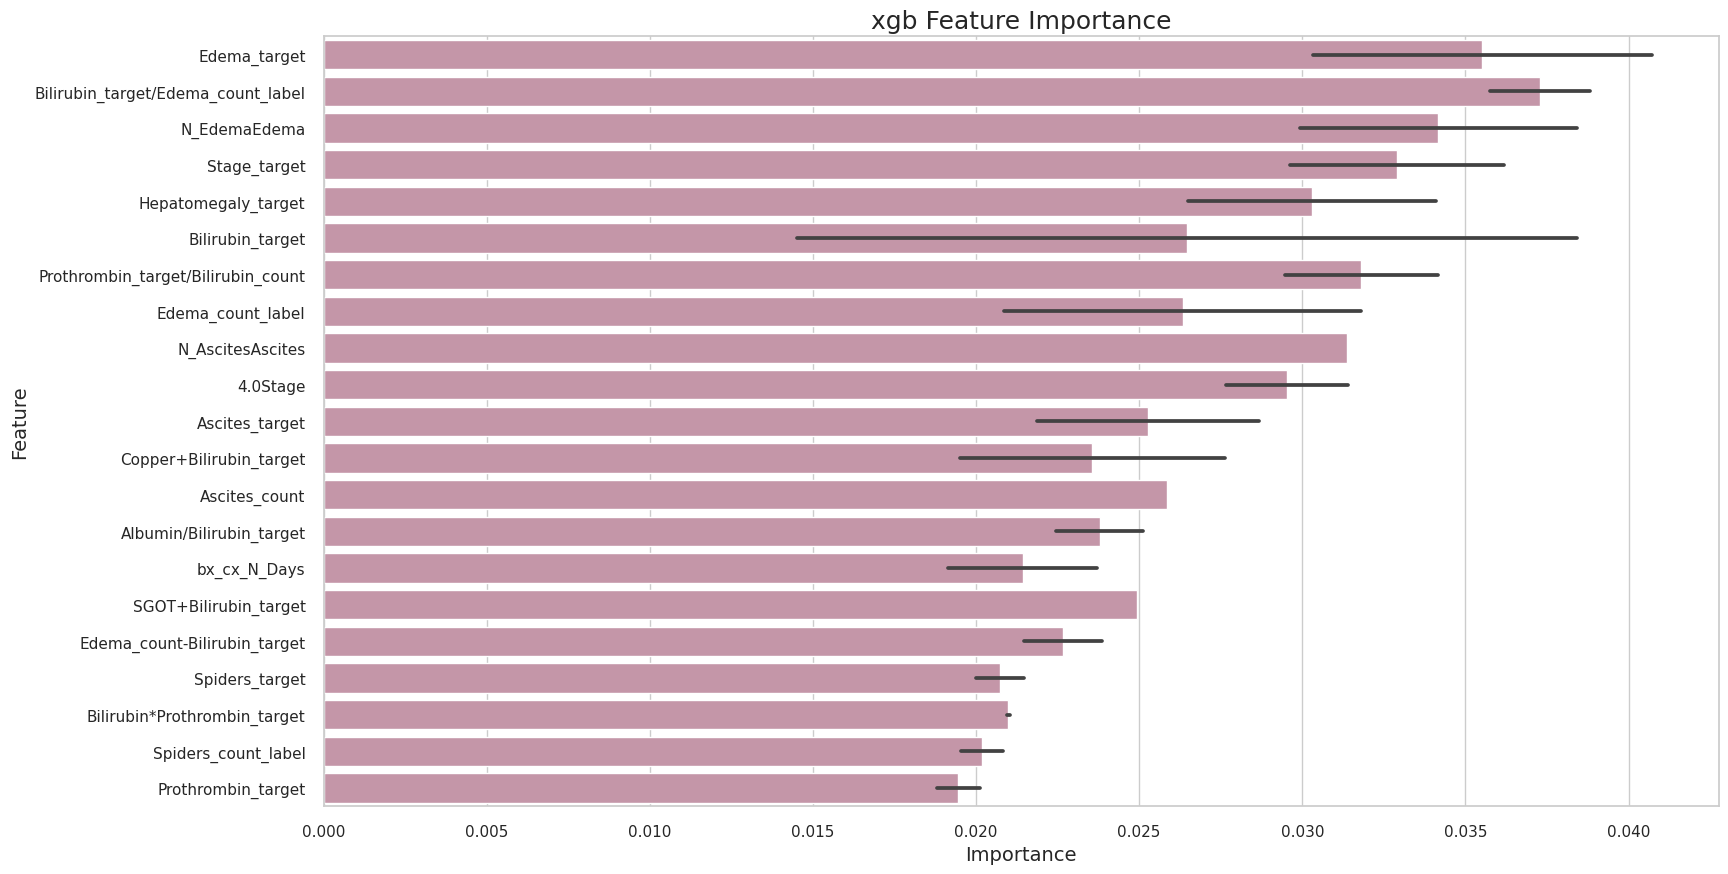

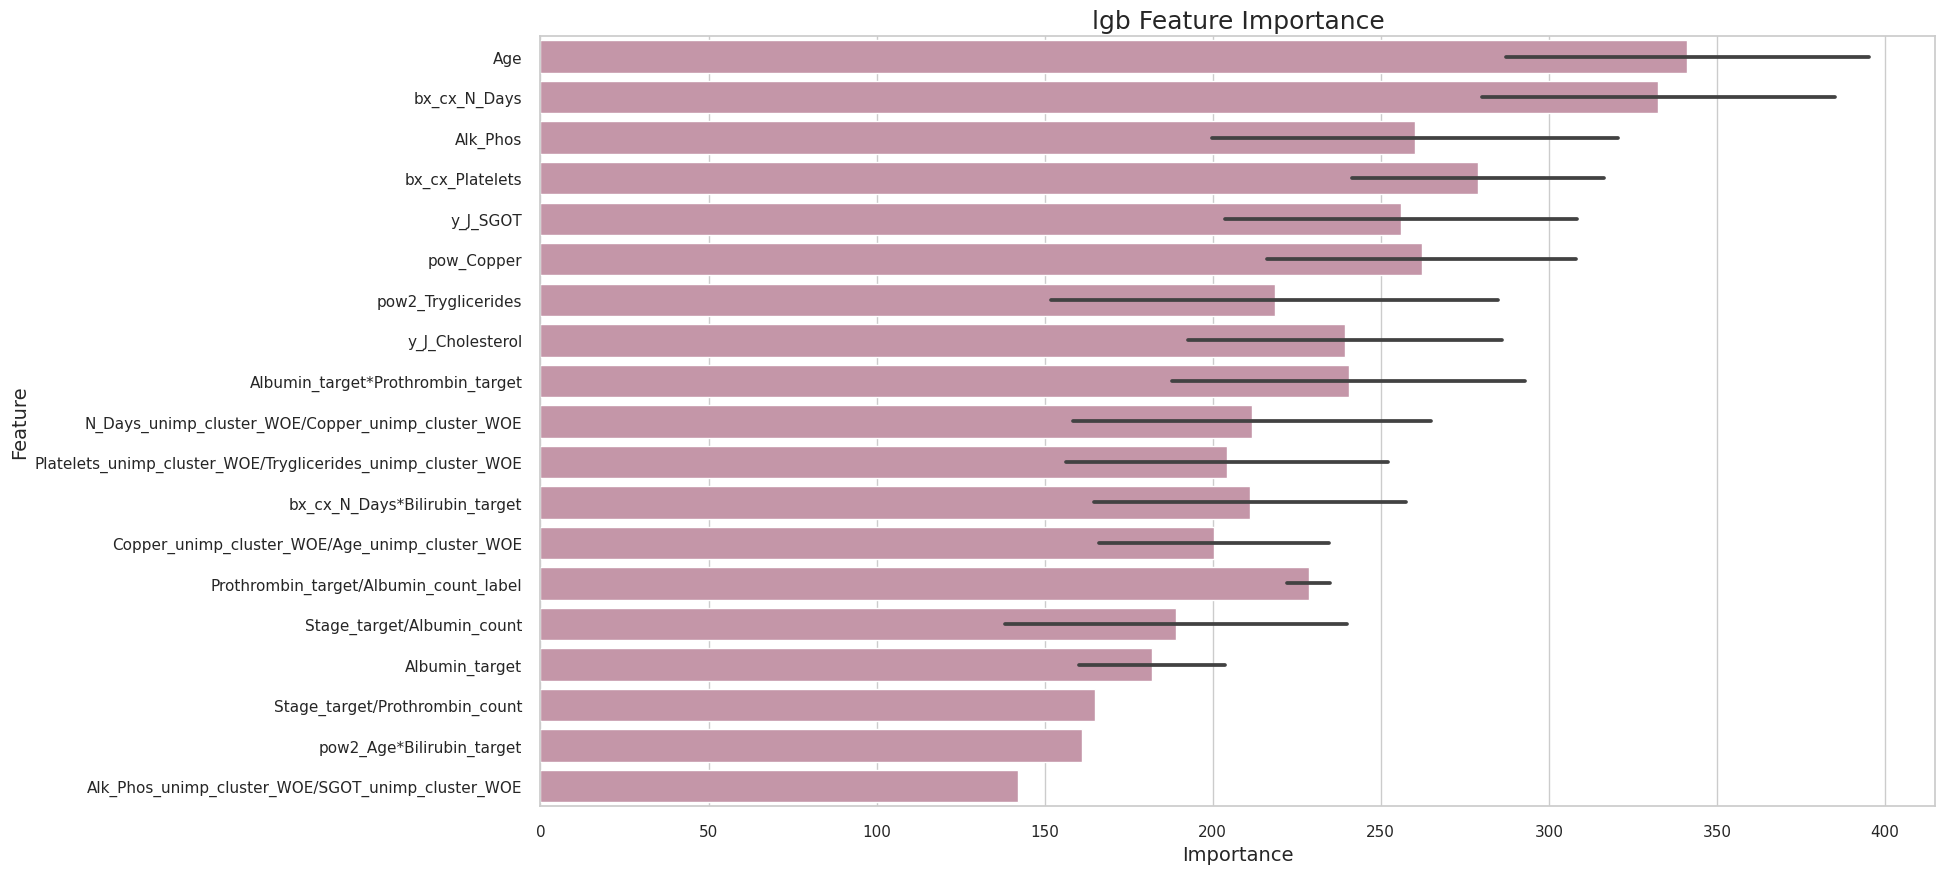

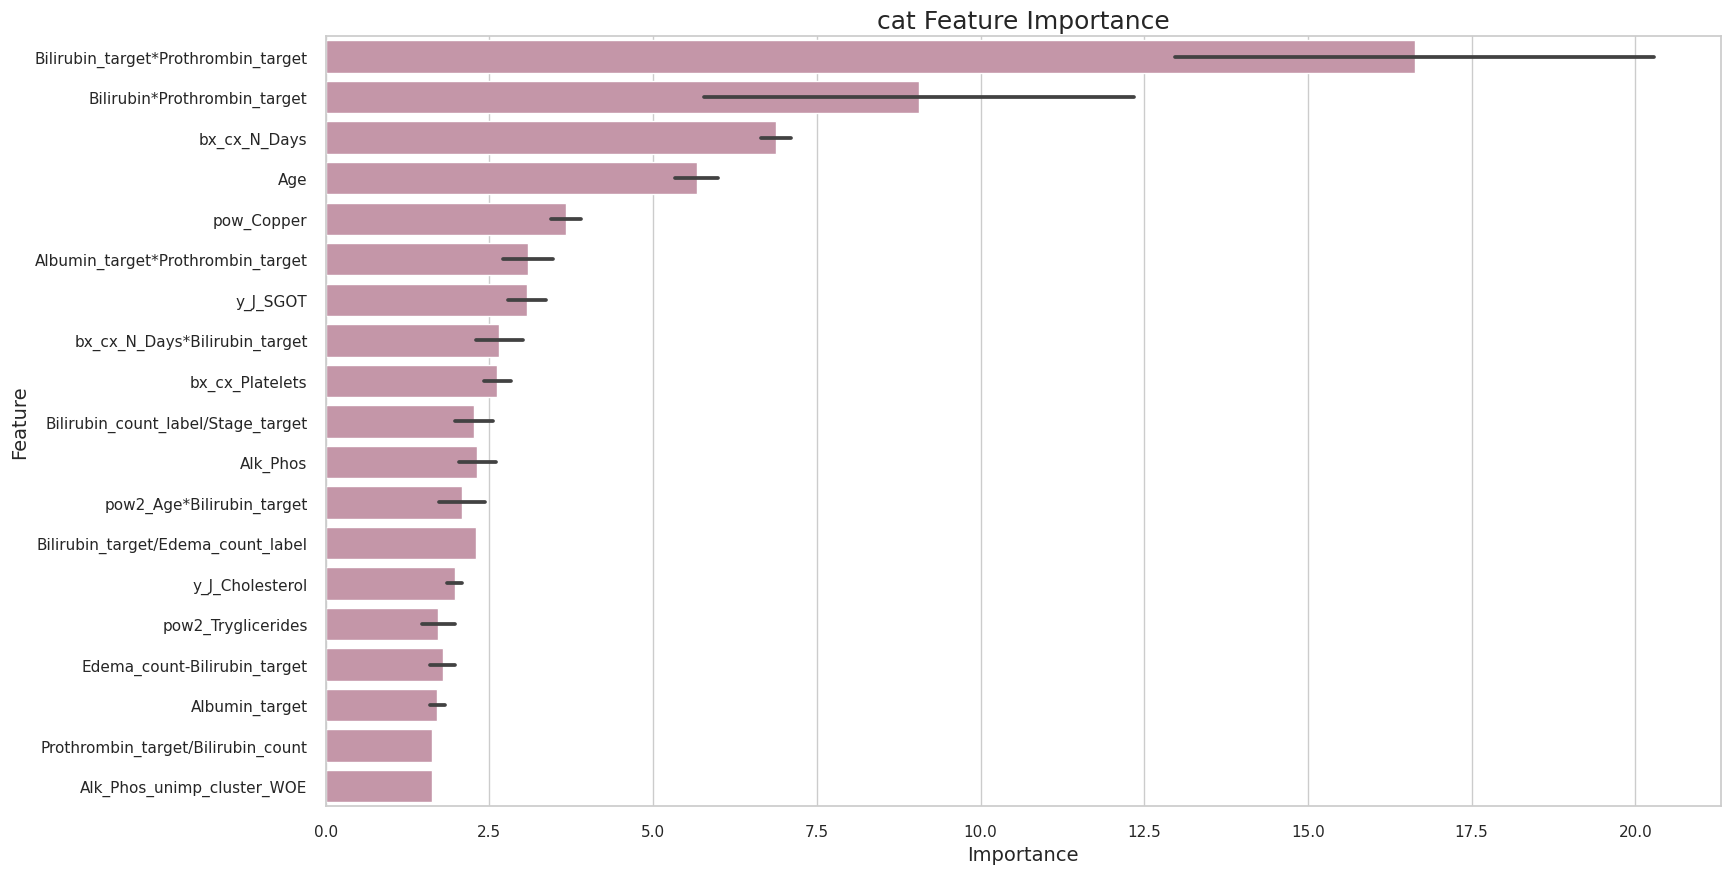

In [50]:
# Feature Importance Visualisation:


def visualize_importance(models, feature_cols, title, head=15):
    importances = []
    feature_importance = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["importance"] = model.feature_importances_
        _df["feature"] = pd.Series(feature_cols)
        _df["fold"] = i
        _df = _df.sort_values('importance', ascending=False)
        _df = _df.head(head)
        feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    # display(feature_importance.groupby(["feature"]).mean().reset_index().drop('fold', axis=1))
    plt.figure(figsize=(18, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance, color= (0.8, 0.56, 0.65), errorbar='sd')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'{title} Feature Importance', fontsize=18)
    plt.grid(True, axis='x')
    plt.show()
    
for name, models in trained_models.items():
    visualize_importance(models, list(X_train.columns), name)

In [51]:
# Submission

In [52]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')

cols=['Status_C','Status_CL','Status_D']

sub[cols] =  test_predss
sub[cols]=sub[cols].div(sub[cols].sum(axis=1), axis=0)
sub.to_csv('submission_pure.csv',index=False)
sub.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.660146,0.041993,0.297861
1,7906,0.543991,0.161082,0.294927
2,7907,0.028504,0.028627,0.942868
3,7908,0.970642,0.006051,0.023306
4,7909,0.868566,0.043202,0.088231


In [53]:
sub1=pd.read_csv('/kaggle/input/s03e26-blend/submission.csv')
sub2=pd.read_csv('/kaggle/input/ps-s3-e26-lgbm-xgb-preprocessing-fasteda/submission.csv')

sub_list=[sub1,sub2,sub]
def ensemble_mean(sub_list):
    
    sub_out=sub_list[0].copy()
    
    
    for col in cols:
        sub_out[col]=sum(df[col] for df in sub_list)/len(sub_list)
    sub_out[cols]=sub_out[cols].div(sub_out[cols].sum(axis=1), axis=0)
    
    return sub_out
    
sub_ensemble=ensemble_mean(sub_list)
sub_ensemble.to_csv('submission.csv',index=False)
sub_ensemble.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.510462,0.035161,0.454377
1,7906,0.506338,0.219761,0.273901
2,7907,0.034385,0.018454,0.947161
3,7908,0.972801,0.004632,0.022567
4,7909,0.848556,0.055127,0.096317


In [54]:
# train_data['Status'].value_counts().plot(kind = 'bar')

In [55]:
# train_data.isna().sum()

In [56]:
# train_data.describe()

In [57]:

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histograms for numerical features
# for feature in ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin','Stage']:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data=train_data_preprocessed, x=feature, kde=True)
#     plt.title(f"Distribution of {feature}")
#     plt.show()


In [58]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder


# numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
# categorical_columns = train_data.select_dtypes(include=['object']).columns

# # transformers for numerical and categorical columns
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_columns),
#         ('cat', categorical_transformer, categorical_columns)
#     ])


# X_preprocessed = preprocessor.fit_transform(train_data)

# # one-hot encoding
# columns_after_preprocessing = (
#     list(numerical_columns) +
#     list(preprocessor.named_transformers_['cat']
#          .named_steps['onehot']
#          .get_feature_names_out(categorical_columns))
# )

# # Create a DataFrame with preprocessed data
# train_data_preprocessed = pd.DataFrame(X_preprocessed, columns=columns_after_preprocessing)


In [59]:
# test_data_preprocessed.columns

In [60]:
# train_data_preprocessed.sample(2)

In [61]:
# train_data_preprocessed.columns

In [62]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histograms for numerical features
# for feature in ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data=train_data_preprocessed, x=feature, kde=True)
#     plt.title(f"Distribution of {feature}")
#     plt.show()

# # Countplots for categorical features
# for feature in ['Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']:
#     plt.figure(figsize=(8, 4))
#     sns.countplot(x=feature, data=train_data_preprocessed)
#     plt.title(f"Distribution of {feature}")
#     plt.show()


In [63]:
# # Violin plots for numerical features
# sns.violinplot(x="Status_C", y="Bilirubin", data=train_data_preprocessed)
# plt.title("Distribution of Bilirubin across Status_C")
# plt.show()

# # Box plots for numerical features
# sns.boxplot(x="Status_CL", y="Albumin", data=train_data_preprocessed)
# plt.title("Distribution of Albumin across Status_CL")
# plt.show()

# # # Swarm plots for categorical features
# # sns.swarmplot(x="Status_D", y="Drug_D-penicillamine", data=train_data_preprocessed)
# # plt.title("Distribution of Drug_D-penicillamine across Status_D")
# # plt.show()


In [64]:
# # Heatmap for correlations
# plt.figure(figsize=(12, 8))
# sns.heatmap(train_data_preprocessed.corr(), annot=True, cmap="coolwarm")
# plt.title("Correlation Heatmap")
# plt.show()

# # Pair plot for numerical features
# sns.pairplot(train_data_preprocessed[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin']])
# plt.show()


In [65]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(train_data_preprocessed.drop(columns=['Status_C', 'Status_CL', 'Status_D']))

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train_data_preprocessed['Status_C'])
# plt.title("PCA Visualization of Features")
# plt.show()


In [66]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(train_data_preprocessed.drop(columns=['Status_C', 'Status_CL', 'Status_D']))

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=train_data_preprocessed['Status_CL'])
# plt.title("PCA Visualization of Features")
# plt.show()


In [67]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report ,accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# # Assuming 'Status' is the target variable
# X = train_data_preprocessed.drop(columns = ['Status_C','Status_CL','Status_D'],axis = 1)
# y = train_data_preprocessed[['Status_C','Status_CL','Status_D']]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # Initialize the Random Forest Classifier
# model = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# # Train the model
# # model.fit(X_train, y_train)
# grid_search = GridSearchCV(
#     estimator=model, 
#     param_grid=param_grid, 
#     cv=3, 
#     scoring='accuracy')

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)


# # Get the best model
# best_rf_model = grid_search.best_estimator_

# # Make predictions on the validation set
# y_pred = best_rf_model.predict(X_test)

# # # Make predictions on the test set
# # y_pred = model.predict(X_test)

# # Print classification report
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test, y_pred))


In [68]:
# from sklearn.model_selection import train_test_split

# # Split the data into features (X) and target variables (y)
# X = train_data_preprocessed.drop(columns=['Status_C', 'Status_CL', 'Status_D'])
# y = train_data_preprocessed[['Status_C', 'Status_CL', 'Status_D']]

# # Split into training and validation sets (80/20 split as an example)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [69]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Check for GPU availability
# if tf.config.list_physical_devices('GPU'):
#     device_name = tf.test.gpu_device_name()
#     print(f"GPU found: {device_name}")
# else:
#     print("No GPU found. Using CPU instead.")

# # Load the preprocessed data
# X_train = train_data_preprocessed.drop(columns=['Status_C', 'Status_CL', 'Status_D'])
# y_train = train_data_preprocessed[['Status_C', 'Status_CL', 'Status_D']]  # Multi-class target

# # Create the neural network model
# model = models.Sequential([
#     layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
#     layers.Dropout(0.2),  # Regularization
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(3, activation='softmax')  # Output layer for multi-class classification
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # Loss for multi-class classification
#               metrics=['accuracy'])

# # Use GPU for training if available
# with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
#     model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
#               callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])  # Early stopping


In [70]:
# y_pred = model.predict(X_val)  # Replace model with your trained model object


In [71]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder


# test_data = test_data.drop(columns = 'id')
# # Separate numerical and categorical columns
# numerical_columns = test_data.select_dtypes(include=['float64', 'int64']).columns
# categorical_columns = test_data.select_dtypes(include=['object']).columns

# # Create transformers for numerical and categorical columns
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Create a preprocessor using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_columns),
#         ('cat', categorical_transformer, categorical_columns)
#     ])

# # Apply preprocessing to the training data
# X_preprocessed = preprocessor.fit_transform(test_data)

# # Get feature names after one-hot encoding
# columns_after_preprocessing = (
#     list(numerical_columns) +
#     list(preprocessor.named_transformers_['cat']
#          .named_steps['onehot']
#          .get_feature_names_out(categorical_columns))
# )

# # Create a DataFrame with preprocessed data
# test_data_preprocessed = pd.DataFrame(X_preprocessed, columns=columns_after_preprocessing)


In [72]:
# X_val.columns == test_data_preprocessed.columns

In [73]:
# test_pred_ = model.predict(test_data_preprocessed)

In [74]:
# # Create a submission file
# submission_df = pd.DataFrame({
#     'id': test_data_id,
#     'Status_C': test_pred_[:, 0],
#     'Status_CL': test_pred_[:, 1],
#     'Status_D': test_pred_[:, 2]
# })

In [75]:
# submission_df

In [76]:
# # Save the submission file
# submission_df.to_csv('submission.csv', index=False)